# Máster en Data Science - Machine Learning

# Tratamiento de Valores missing, outlier y correlaciones
Autor: Ramón Morillo Barrera

## Dataset: Application data

En este notebook trabajaremos en el análisis exploratorio gráfico con el objetivo de visualizar y entender el comportamiento de las variables. Trabajaremos en el tratamiento de valores nulos o missing, outliers y estudiaremos la correlacion entre variables.

Como comentamos anteriormente, se llevará a cabo una separación estratificada en el paso de train-test split debido al desbalanceo de la variable objetivo.

#### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from termcolor import colored, cprint
import scipy.stats as ss
import warnings
import sys
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Funciones

In [2]:
sys.path.append('../src')
import funciones_auxiliares as f_aux
sys.path.remove('../src')

# Constante
seed = 12354

#### Importo el dataset

In [3]:
df_loan = pd.read_csv('../../data_loan_status/data_preprocessing/pd_data_initial_preprocessing.csv')
df_loan.head()

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0      100002          0.0143           0.0144           0.0144   
1      100003          0.0605           0.0608           0.0497   
2      100004             NaN              NaN              NaN   
3      100006             NaN              NaN              NaN   
4      100007             NaN              NaN              NaN   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
0                   0.0000                    0.0000   
1                   0.0039                    0.0039   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                      NaN                       NaN   

   NONLIVINGAPARTMENTS_MODE FONDKAPREMONT_MODE  LIVINGAPARTMENTS_MEDI  \
0                       0.0   reg oper account                 0.0205   
1                       0.0   reg oper account                 0.0787   
2                       NaN                NaN                    NaN   
3                       NaN                NaN                    NaN   
4                       NaN                NaN                    NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  FLOORSMIN_MODE  FLOORSMIN_AVG  \
0                0.0202                  0.022          0.1250         0.1250   
1                0.0773                  0.079          0.3333         0.3333   
2                   NaN                    NaN             NaN            NaN   
3                   NaN                    NaN             NaN            NaN   
4                   NaN                    NaN             NaN            NaN   

   FLOORSMIN_MEDI  YEARS_BUILD_MODE  YEARS_BUILD_MEDI  YEARS_BUILD_AVG  \
0          0.1250            0.6341            0.6243           0.6192   
1          0.3333            0.8040            0.7987           0.7960   
2             NaN               NaN               NaN              NaN   
3             NaN               NaN               NaN              NaN   
4             NaN               NaN               NaN              NaN   

   OWN_CAR_AGE  LANDAREA_MEDI  LANDAREA_AVG  LANDAREA_MODE  BASEMENTAREA_MODE  \
0          NaN         0.0375        0.0369         0.0377             0.0383   
1          NaN         0.0132        0.0130         0.0128             0.0538   
2         26.0            NaN           NaN            NaN                NaN   
3          NaN            NaN           NaN            NaN                NaN   
4          NaN            NaN           NaN            NaN                NaN   

   BASEMENTAREA_AVG  BASEMENTAREA_MEDI  EXT_SOURCE_1  NONLIVINGAREA_AVG  \
0            0.0369             0.0369      0.083037             0.0000   
1            0.0529             0.0529      0.311267             0.0098   
2               NaN                NaN           NaN                NaN   
3               NaN                NaN           NaN                NaN   
4               NaN                NaN           NaN                NaN   

   NONLIVINGAREA_MODE  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  \
0                 0.0                0.00            0.00           0.00   
1                 0.0                0.01            0.08           0.08   
2                 NaN                 NaN             NaN            NaN   
3                 NaN                 NaN             NaN            NaN   
4                 NaN                 NaN             NaN            NaN   

   ELEVATORS_MODE WALLSMATERIAL_MODE  APARTMENTS_AVG  APARTMENTS_MODE  \
0          0.0000       Stone, brick          0.0247           0.0252   
1          0.0806              Block          0.0959           0.0924   
2             NaN                NaN             NaN              NaN   
3             NaN                NaN             NaN              NaN   
4             NaN                NaN             NaN              NaN   

   APARTMENTS_MEDI  ENTRANCES_MEDI  ENTRANCES_MODE  ENTRAN

In [4]:
df_loan.columns

Index(['SK_ID_CURR', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       ...
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object', length=122)

### Cambio de tipo de variables categóricas

Cambio el tipo de las variables object a category

In [5]:
list_var_cat, other = f_aux.dame_variables_categoricas(dataset=df_loan)
df_loan[list_var_cat] = df_loan[list_var_cat].astype("category")
list_var_continuous = list(df_loan.select_dtypes('float').columns)
df_loan[list_var_continuous] = df_loan[list_var_continuous].astype(float)
df_loan.dtypes

SK_ID_CURR                         int64
COMMONAREA_AVG                   float64
COMMONAREA_MEDI                  float64
COMMONAREA_MODE                  float64
NONLIVINGAPARTMENTS_AVG          float64
NONLIVINGAPARTMENTS_MEDI         float64
NONLIVINGAPARTMENTS_MODE         float64
FONDKAPREMONT_MODE              category
LIVINGAPARTMENTS_MEDI            float64
LIVINGAPARTMENTS_AVG             float64
LIVINGAPARTMENTS_MODE            float64
FLOORSMIN_MODE                   float64
FLOORSMIN_AVG                    float64
FLOORSMIN_MEDI                   float64
YEARS_BUILD_MODE                 float64
YEARS_BUILD_MEDI                 float64
YEARS_BUILD_AVG                  float64
OWN_CAR_AGE                      float64
LANDAREA_MEDI                    float64
LANDAREA_AVG                     float64
LANDAREA_MODE                    float64
BASEMENTAREA_MODE                float64
BASEMENTAREA_AVG                 float64
BASEMENTAREA_MEDI                float64
EXT_SOURCE_1    

### Separación Train-Test estratificada

Separaré el dataset en train y test manteniendo la proporción de la variable objetivo. Pero antes, voy a graficar la proporción de dicha variable.

In [6]:
target_count = df_loan.groupby('TARGET').agg({'TARGET':'count'}).reset_index(drop=True)
target_count['value'] = list(target_count.index)
target_count

TARGET  value
0  282686      0
1   24825      1

In [7]:
df_plot_loan_status = df_loan['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

df_plot_loan_status_conteo = df_loan['TARGET'].value_counts(normalize=True).reset_index()
df_plot_loan_status_conteo

TARGET  proportion
0       0    0.919271
1       1    0.080729

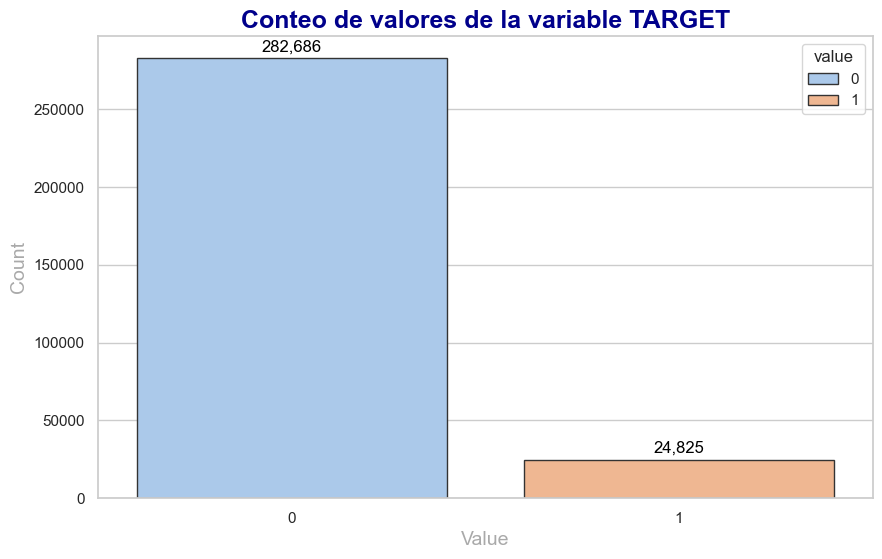

In [8]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=target_count, 
    x='value', 
    y='TARGET', 
    ax=ax, 
    hue='value', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type="edge", padding=3, fontsize=12, color="black")

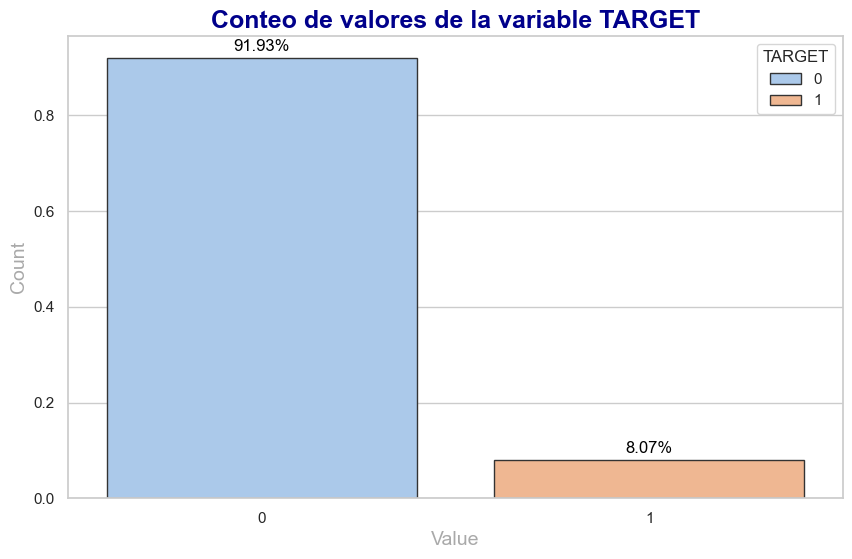

In [9]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=df_plot_loan_status_conteo, 
    x='TARGET', 
    y='proportion', 
    ax=ax, 
    hue='TARGET', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2%}', label_type="edge", padding=3, fontsize=12, color="black")

Calculé y grafiqué los valores de la variable Target para combrobar que al realizar la separación en train y test las proporciones se mantengan gracias a la estratificación.

In [10]:
from sklearn.model_selection import train_test_split
X_df_loan, X_df_loan_test, y_df_loan, y_df_loan_test = train_test_split(df_loan.drop('TARGET',axis=1), 
                                                                     df_loan['TARGET'], 
                                                                     stratify=df_loan['TARGET'], 
                                                                     test_size=0.2)
df_loan_train = pd.concat([X_df_loan, y_df_loan],axis=1)
df_loan_test = pd.concat([X_df_loan_test, y_df_loan_test],axis=1)

In [11]:
print(f'''
\033[1mTRAIN\033[0m:
{y_df_loan.value_counts(normalize=True)}

\033[1mTEST\033[0m:
{y_df_loan_test.value_counts(normalize=True)}''')


TRAIN:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

TEST:
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


La separación estratificada se realizó correctamente. Observamos la misma proporción de la variable TARGET tanto en train como en test.

### Visualización descriptiva de los datos

Vamos a observar la proporción de valores nulos en columnas y filas, además de una visualización descriptiva de la relación de las demás variables con la variable TARGET

In [12]:
pd_series_null_columns = df_loan_train.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df_loan_train.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['TARGET'] = df_loan['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df_loan_train.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_loan_train.shape[1]

(122,) (246008,)


In [13]:
pd_null_columnas

nulos_columnas  porcentaje_columnas
COMMONAREA_AVG                        171905             0.698778
COMMONAREA_MEDI                       171905             0.698778
COMMONAREA_MODE                       171905             0.698778
NONLIVINGAPARTMENTS_MODE              170809             0.694323
NONLIVINGAPARTMENTS_AVG               170809             0.694323
NONLIVINGAPARTMENTS_MEDI              170809             0.694323
FONDKAPREMONT_MODE                    168190             0.683677
LIVINGAPARTMENTS_MEDI                 168161             0.683559
LIVINGAPARTMENTS_AVG                  168161             0.683559
LIVINGAPARTMENTS_MODE                 168161             0.683559
FLOORSMIN_AVG                         166886             0.678376
FLOORSMIN_MODE                        166886             0.678376
FLOORSMIN_MEDI                        166886             0.678376
YEARS_BUILD_MODE                      163614             0.665076
YEARS_BUILD_AVG                       163614             0.665076
YEARS_BUILD_MEDI                      163614             0.665076
OWN_CAR_AGE                           162412             0.660190
LANDAREA_MEDI                         146058             0.593712
LANDAREA_MODE                         146058             0.593712
LANDAREA_AVG                          146058             0.593712
BASEMENTAREA_AVG                      143933             0.585074
BASEMENTAREA_MODE                     143933             0.585074
BASEMENTAREA_MEDI                     143933             0.585074
EXT_SOURCE_1                          138614             0.563453
NONLIVINGAREA_AVG                     135696             0.551592
NONLIVINGAREA_MODE                    135696             0.551592
NONLIVINGAREA_MEDI                    135696             0.551592
ELEVATORS_MODE                        131147             0.533101
ELEVATORS_MEDI                        131147             0.533101
ELEVATORS_AVG                         131147             0.533101
WALLSMATERIAL_MODE                    125108             0.508553
APARTMENTS_MEDI                       124908             0.507740
APARTMENTS_AVG                        124908             0.507740
APARTMENTS_MODE                       124908             0.507740
ENTRANCES_MODE                        123895             0.503622
ENTRANCES_MEDI                        123895             0.503622
ENTRANCES_AVG                         123895             0.503622
LIVINGAREA_AVG                        123444             0.501789
LIVINGAREA_MEDI                       123444             0.501789
LIVINGAREA_MODE                       123444             0.501789
HOUSETYPE_MODE                        123422             0.501699
FLOORSMAX_MODE                        122459             0.497785
FLOORSMAX_MEDI                        122459             0.497785
FLOORSMAX_AVG                         122459             0.497785
YEARS_BEGINEXPLUATATION_AVG           120009             0.487826
YEARS_BEGINEXPLUATATION_MODE          120009             0.487826
YEARS_BEGINEXPLUATATION_MEDI          120009             0.487826
TOTALAREA_MODE                        118723             0.482598
EMERGENCYSTATE_MODE                   116615             0.474029
OCCUPATION_TYPE                        76962             0.312843
EXT_SOURCE_3                           48773             0.198258
AMT_REQ_CREDIT_BUREAU_HOUR             33129             0.134666
AMT_REQ_CREDIT_BUREAU_WEEK             33129             0.134666
AMT_REQ_CREDIT_BUREAU_MON              33129             0.134666
AMT_REQ_CREDIT_BUREAU_YEAR             33129             0.134666
AMT_REQ_CREDIT_BUREAU_DAY              33129             0.134666
AMT_REQ_CREDIT_BUREAU_QRT              33129             0.134666
NAME_TYPE_SUITE                         1040             0.004228
DEF_30_CNT_SOCIAL_CIRCLE                 821             0.003337
OBS_60_CNT_SOCIAL_CIRCLE                 821             0.003337
DEF_

In [14]:
pd_null_filas

nulos_filas  TARGET  porcentaje_filas
269786           61       0               0.5
69707            61       0               0.5
244833           61       0               0.5
197736           61       0               0.5
150206           61       0               0.5
...             ...     ...               ...
134994            0       0               0.0
85268             0       0               0.0
216116            0       1               0.0
156655            0       0               0.0
245999            0       0               0.0

[246008 rows x 3 columns]

Vamos a visualizar la distribución de las variables numéricas y categóricas con la variable TARGET

Genero listas por tipos de variables para visualizarlas a continuación.

In [15]:
df_loan_bool, df_loan_cat, df_loan_num = f_aux.tipos_vars1(df_loan,False)

He programado una función propia para poder visualizar las distribuciones de las variables por separado y sus distribuciones con la variable objetivo. Esta función detecta las variables numéricas y categóricas por separado para elegir el modo en el que se grafican.

La función se encuentra alojada en la carpeta src en el fichero 'funciones_auxiliares.py'

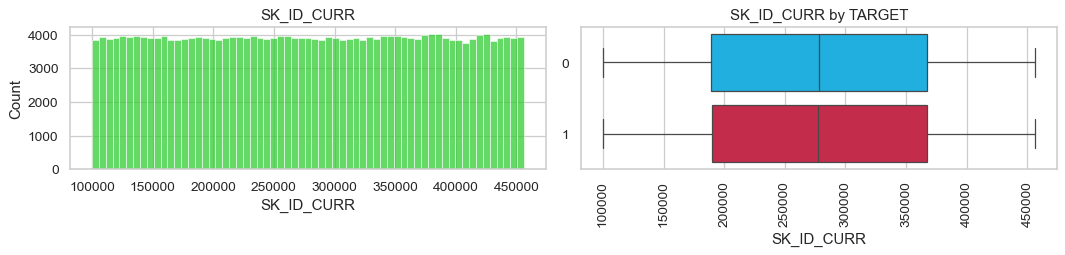

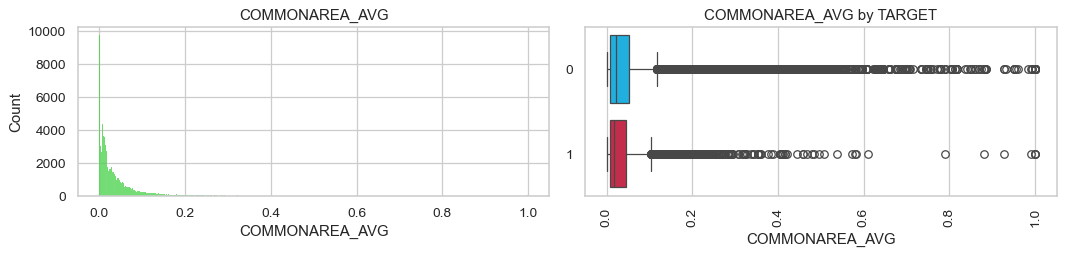

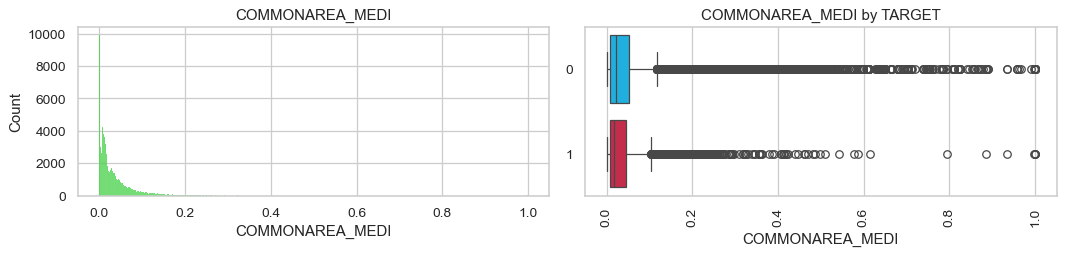

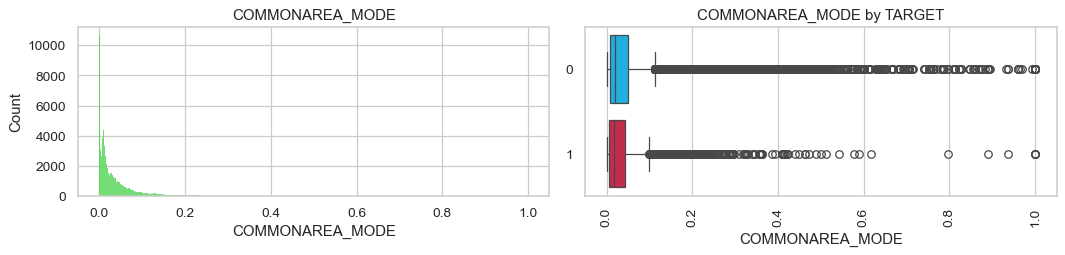

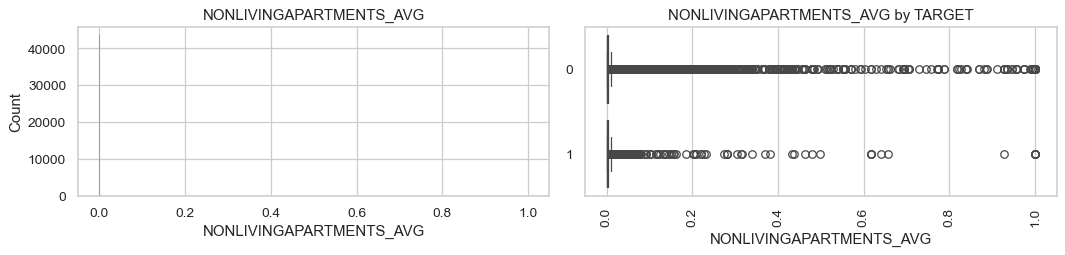

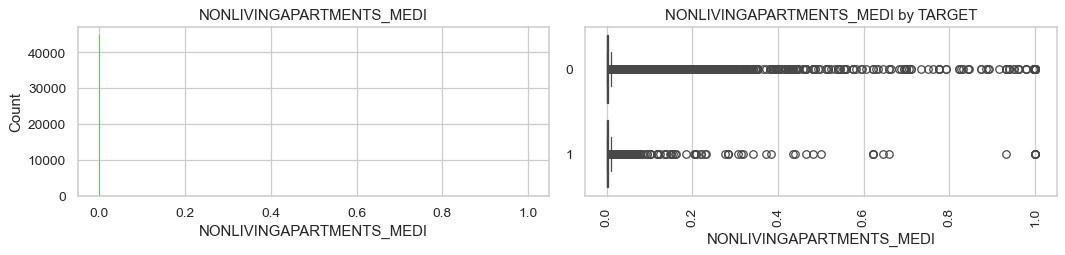

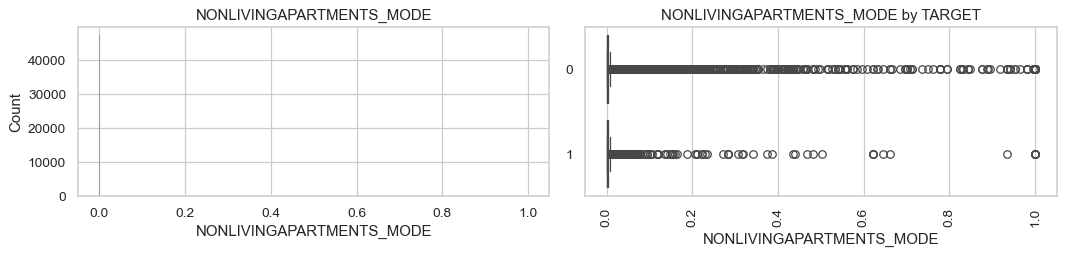

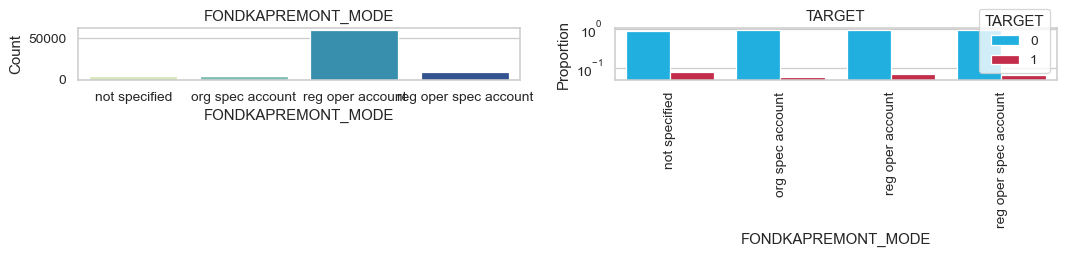

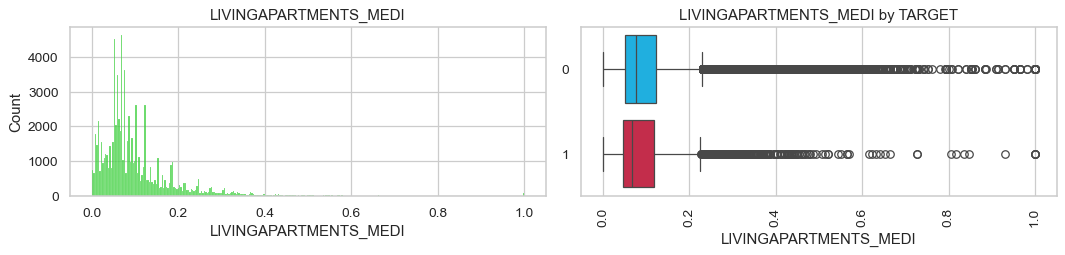

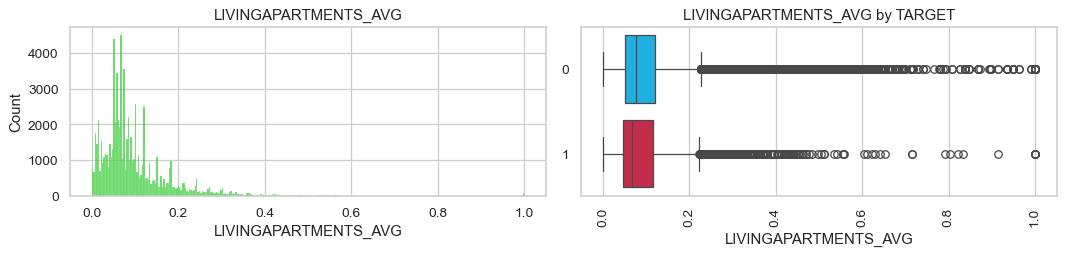

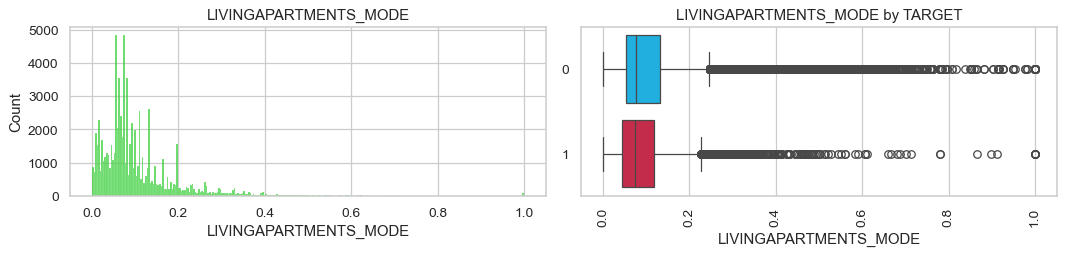

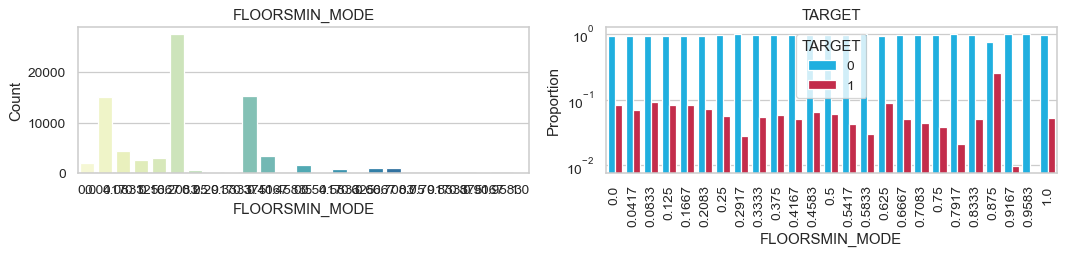

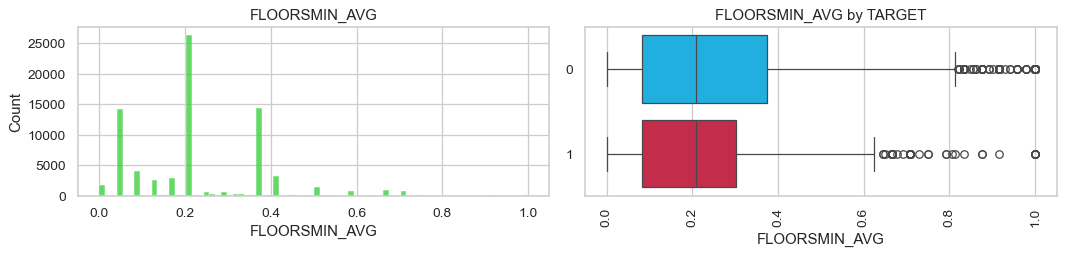

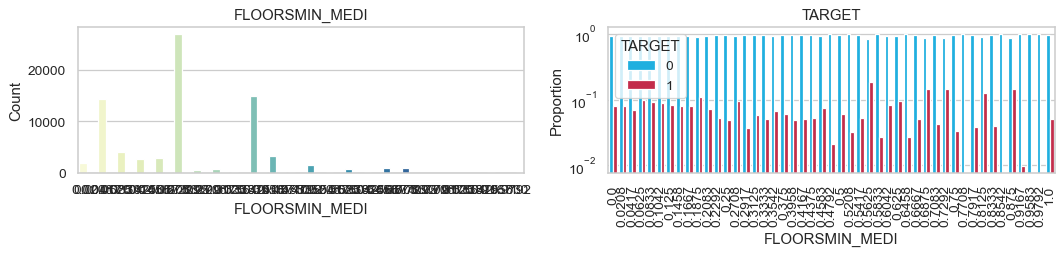

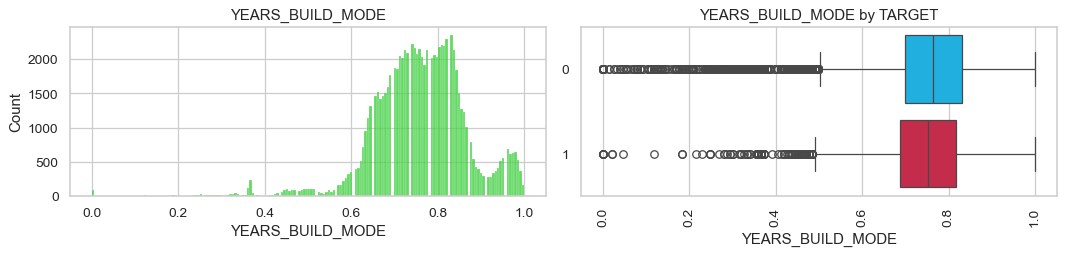

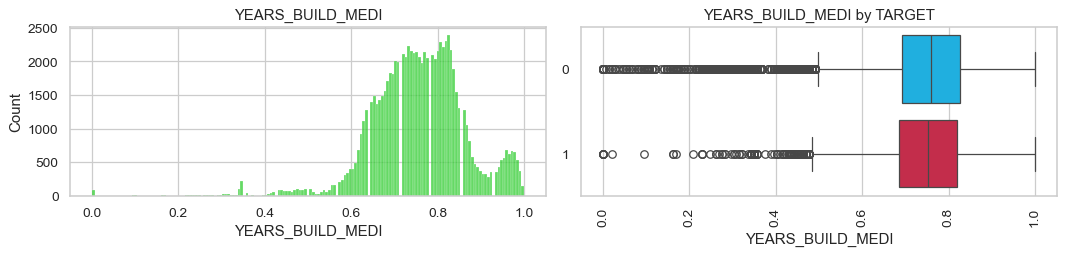

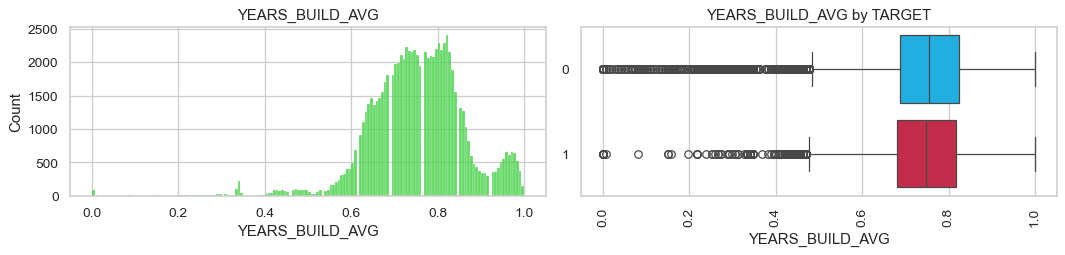

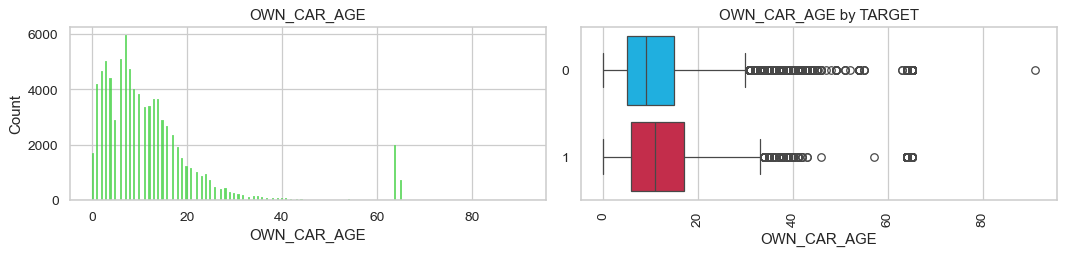

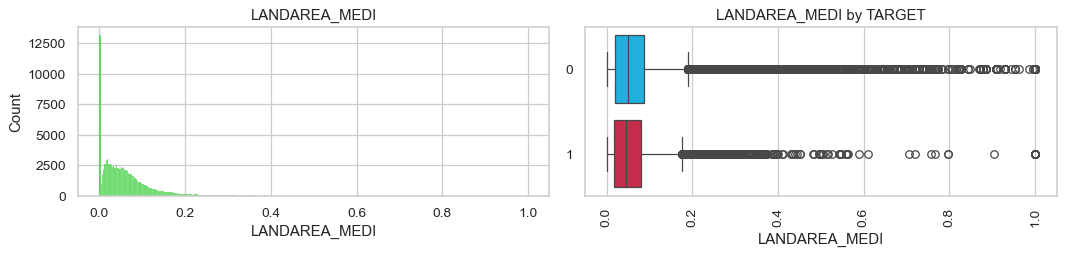

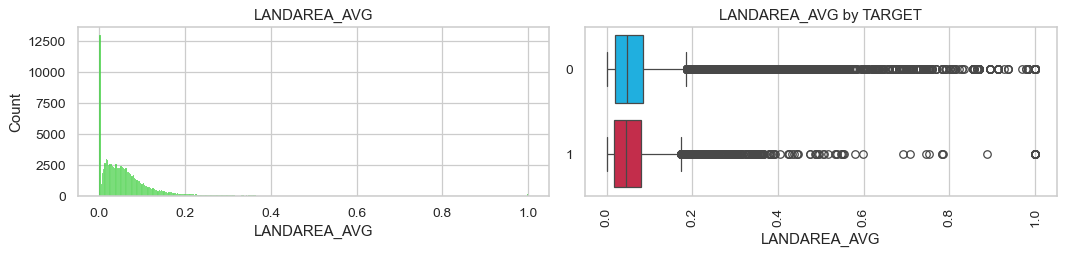

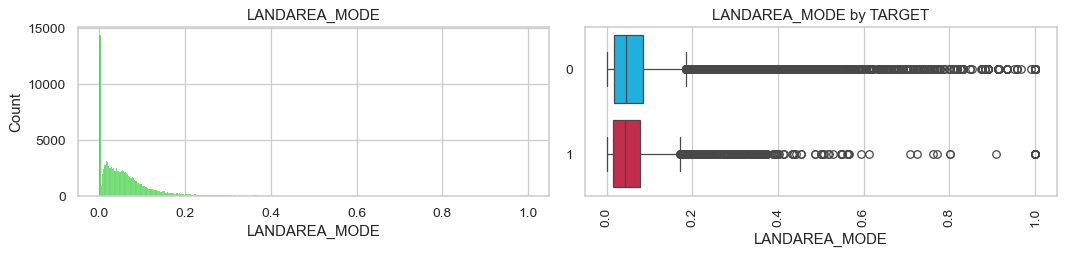

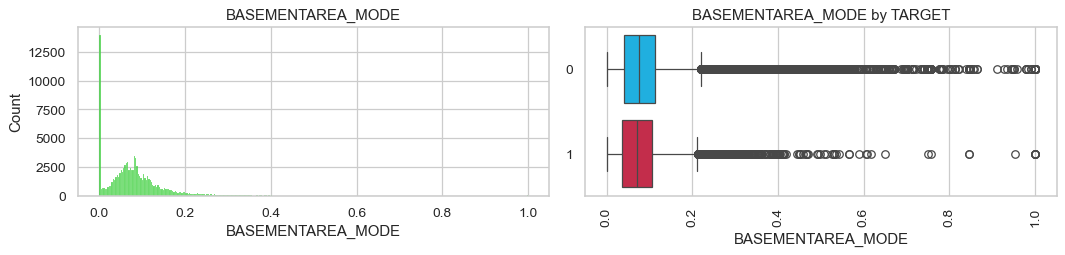

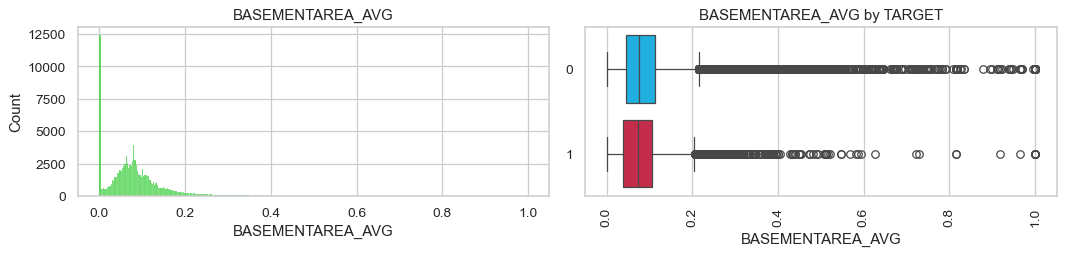

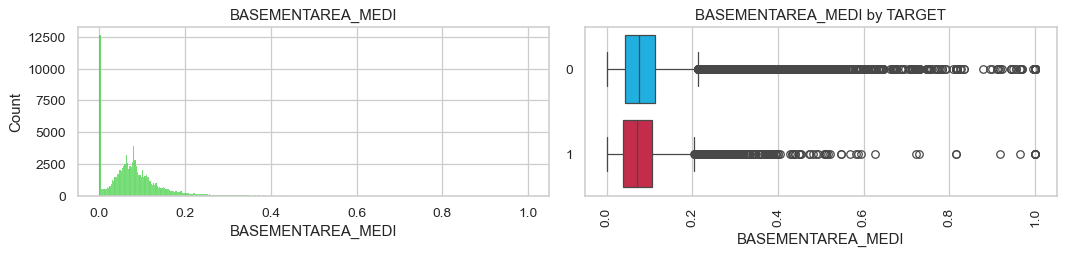

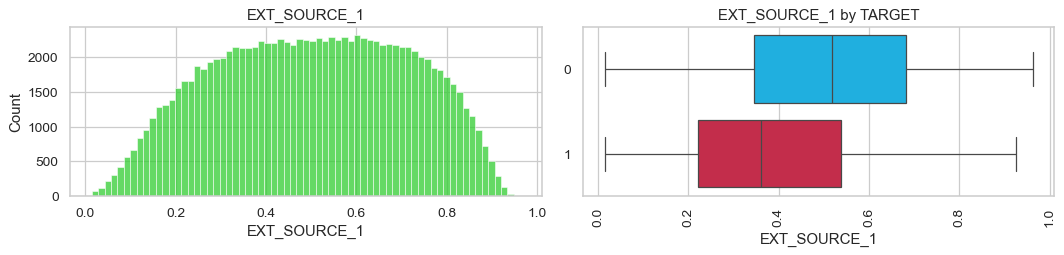

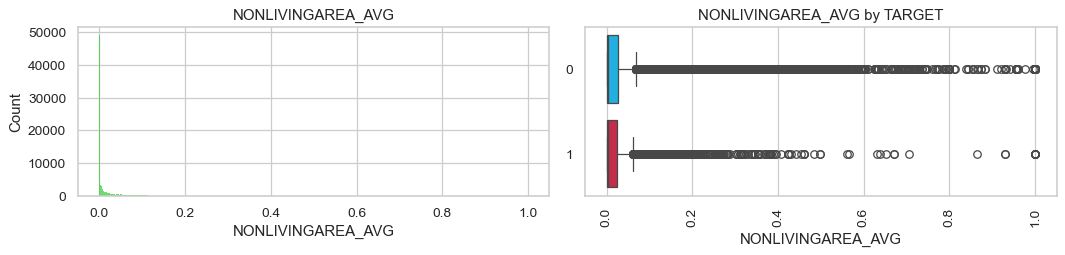

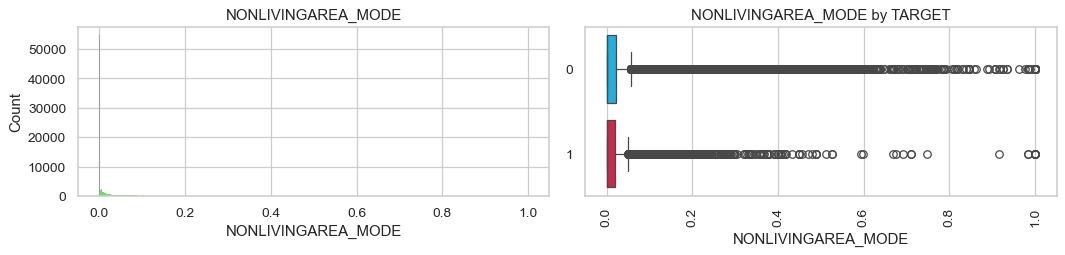

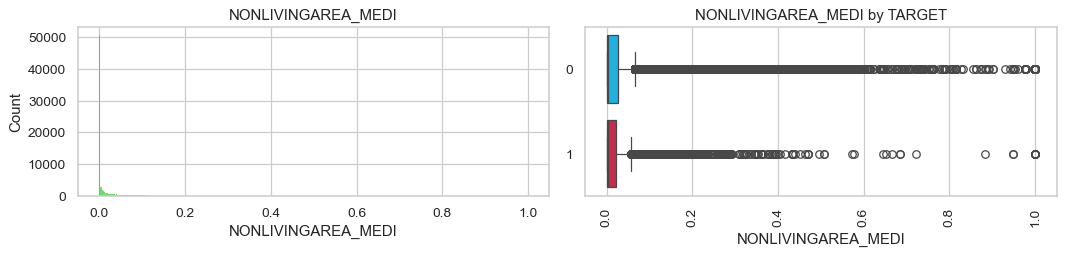

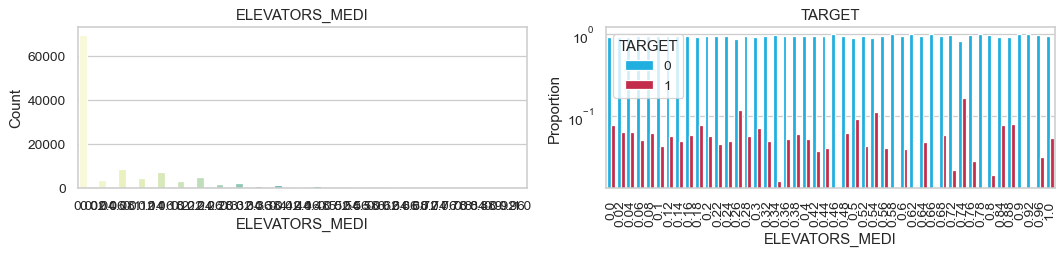

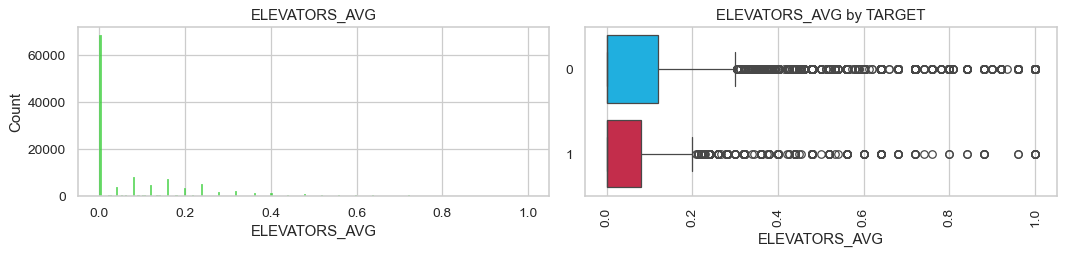

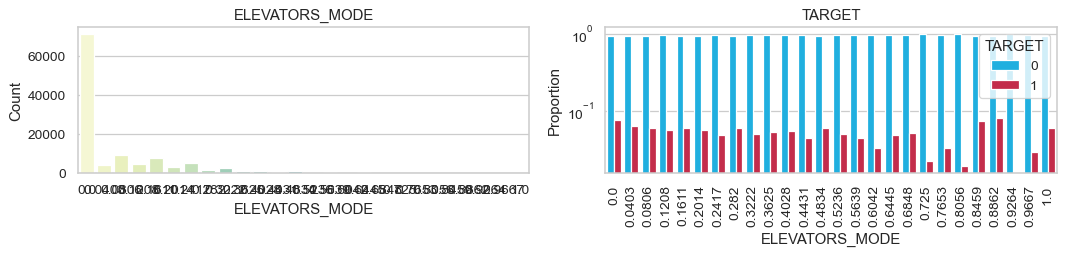

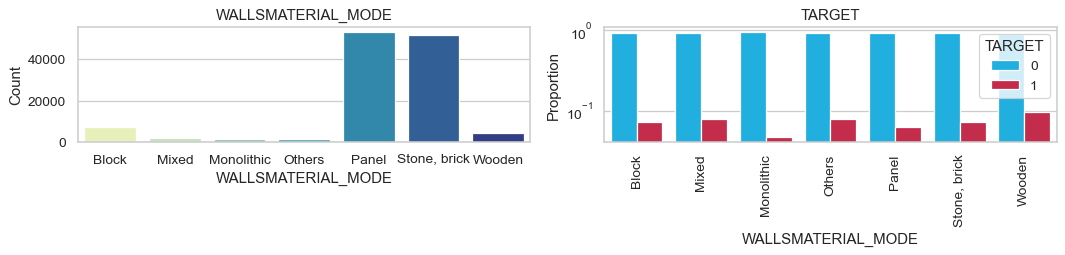

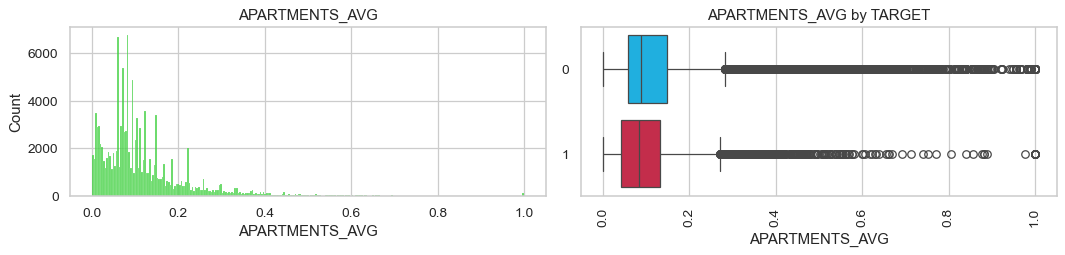

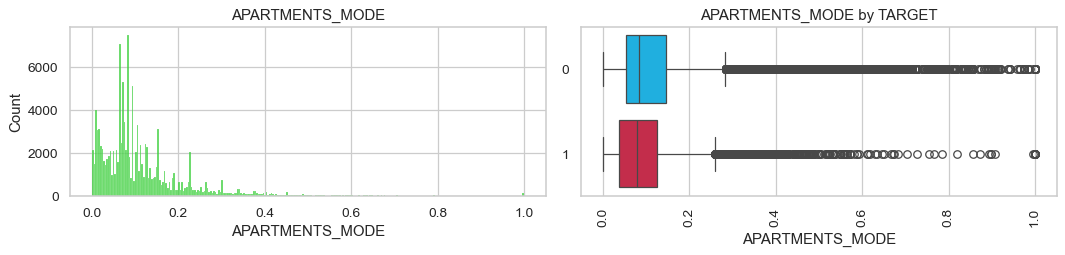

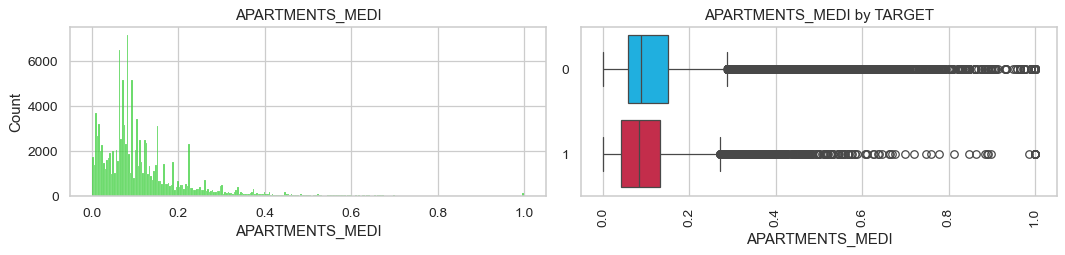

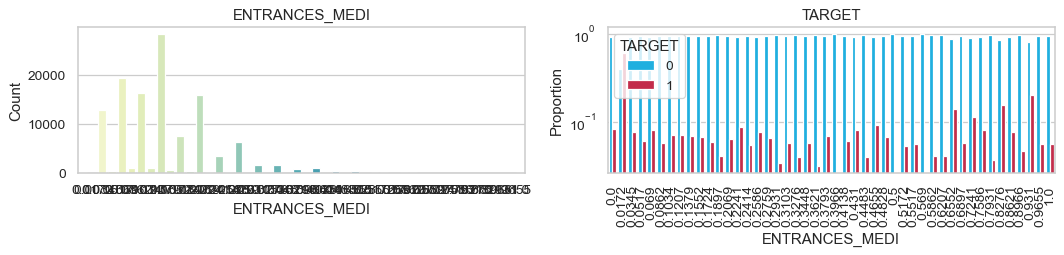

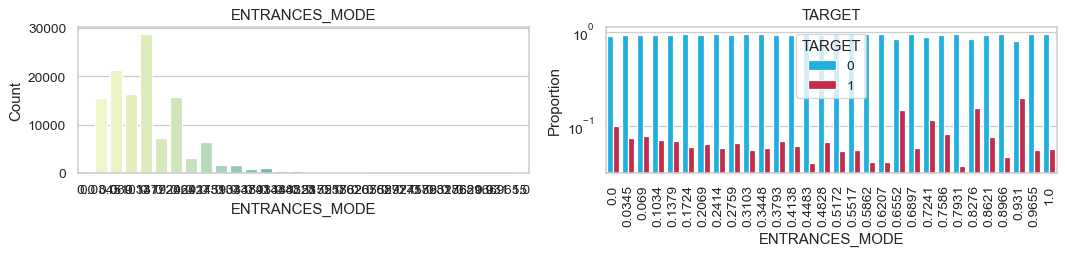

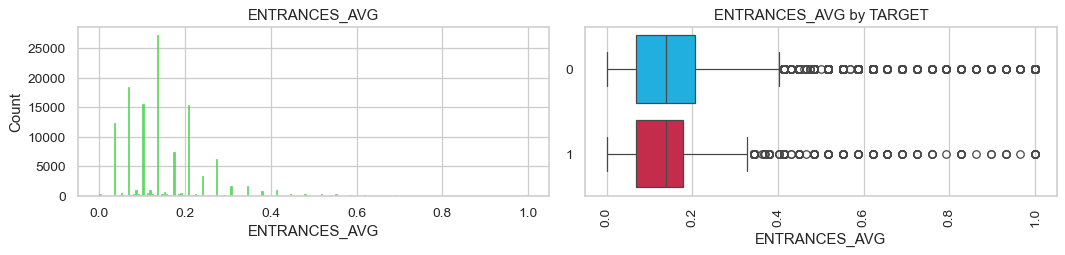

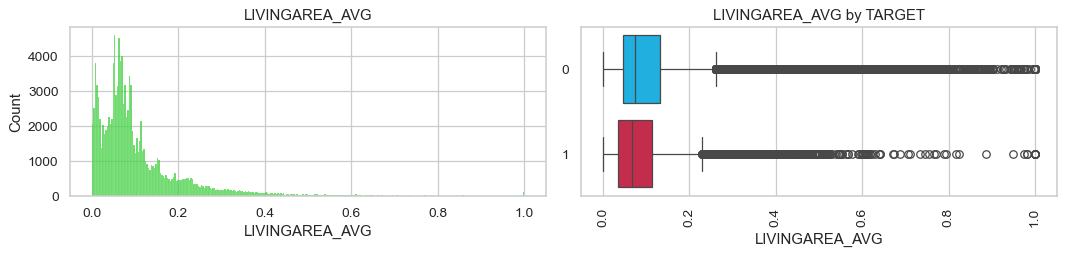

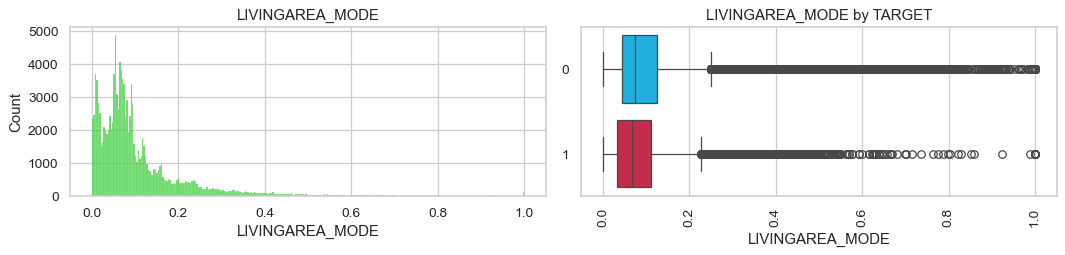

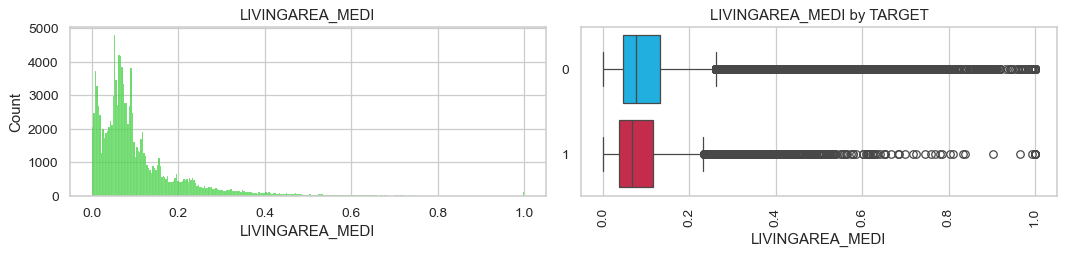

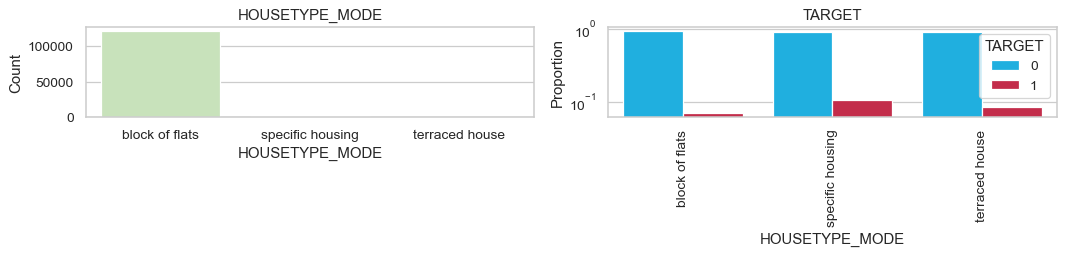

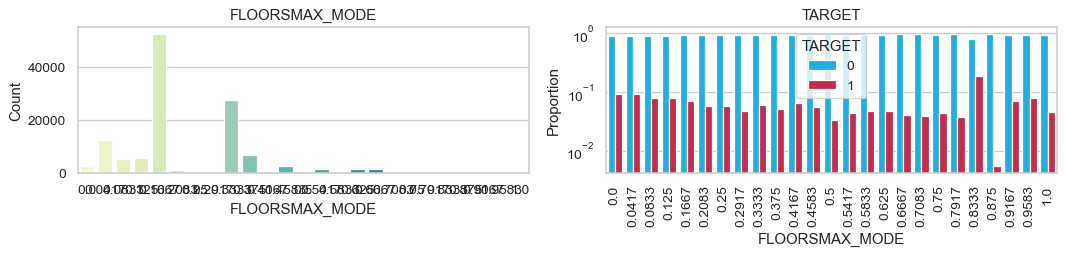

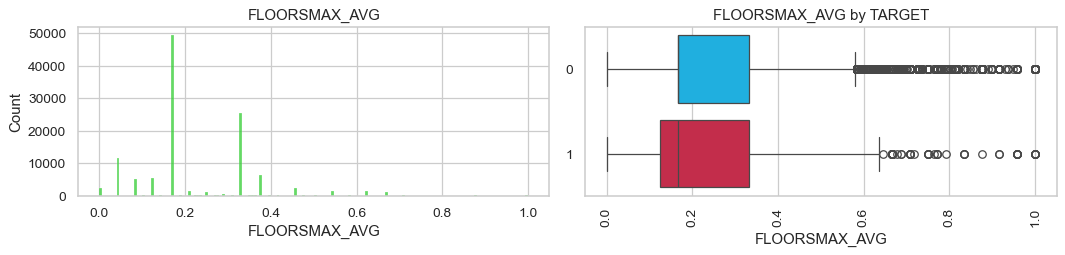

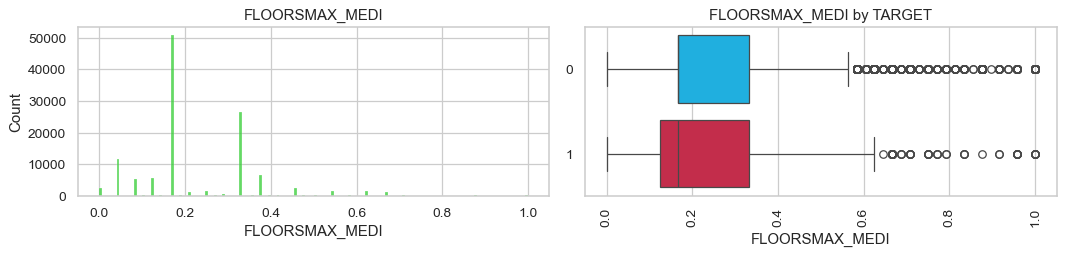

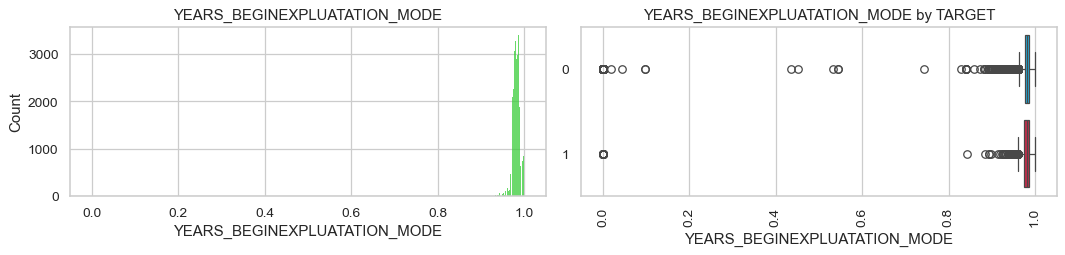

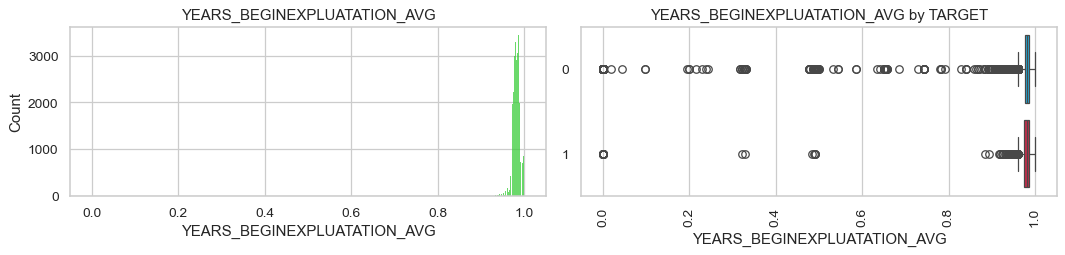

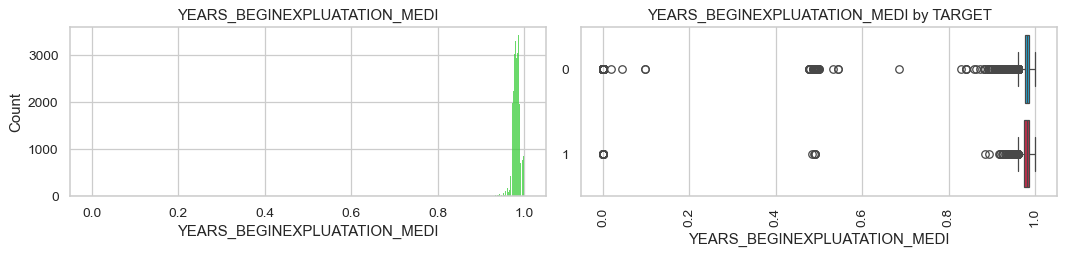

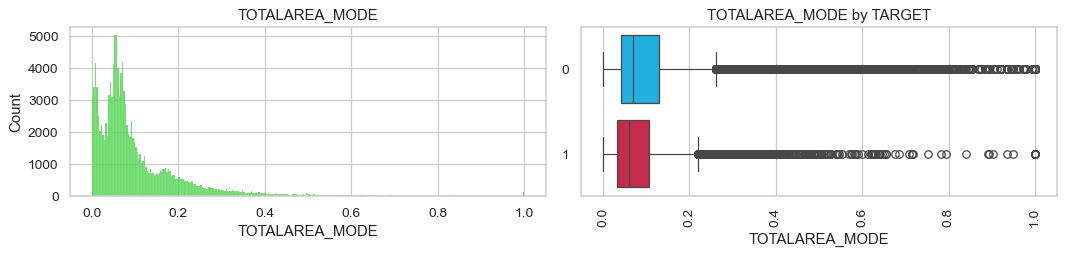

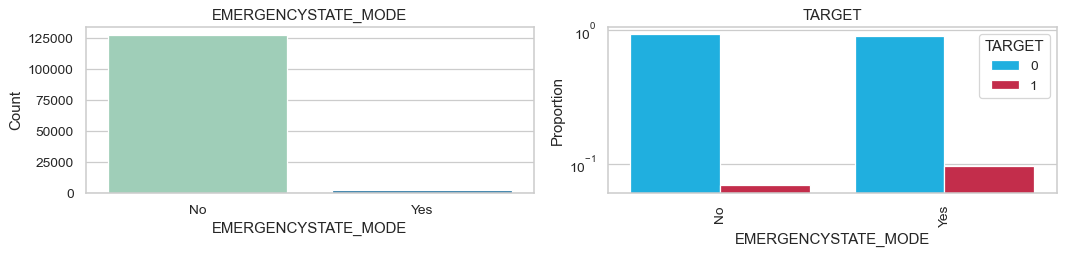

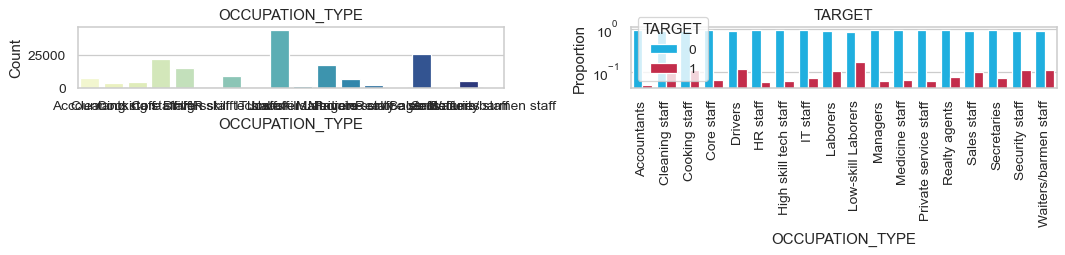

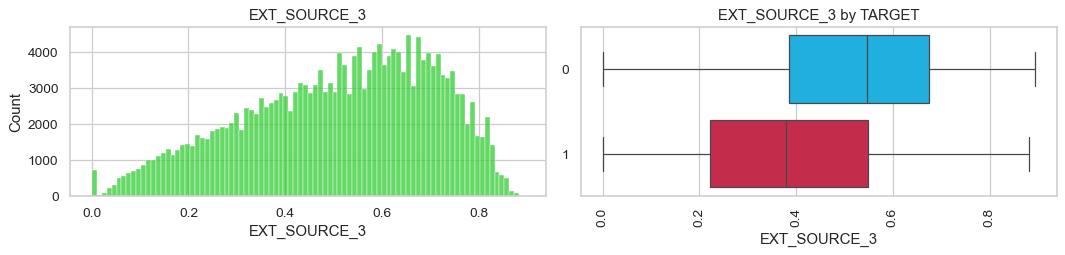

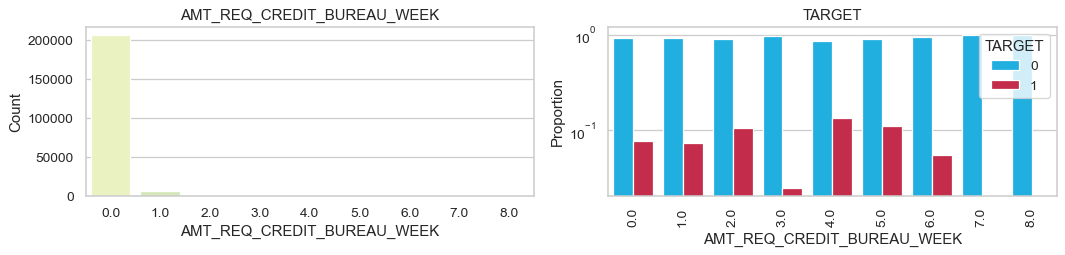

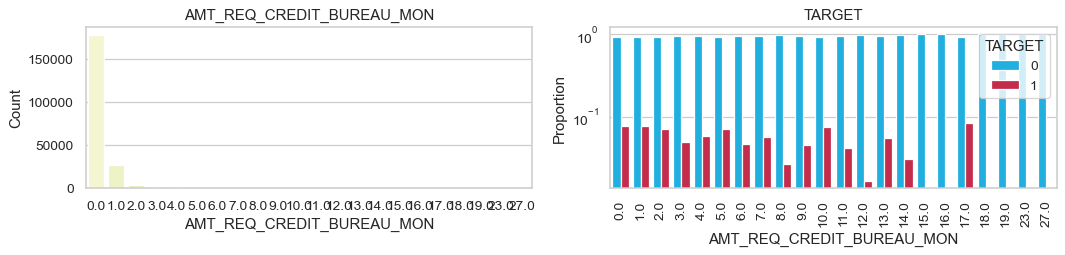

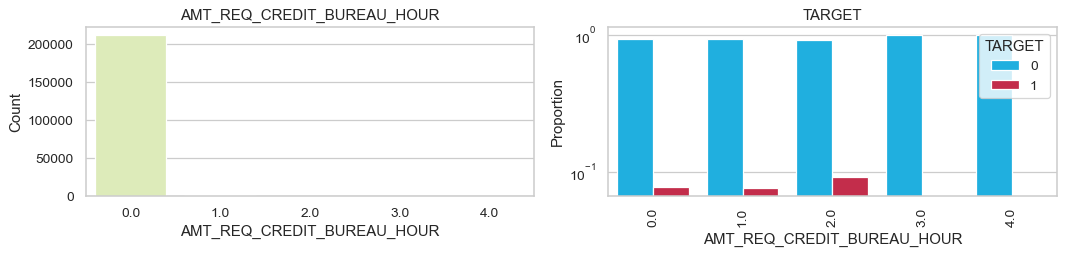

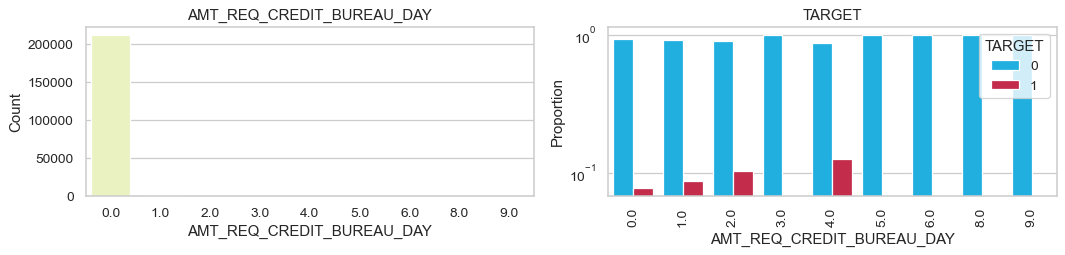

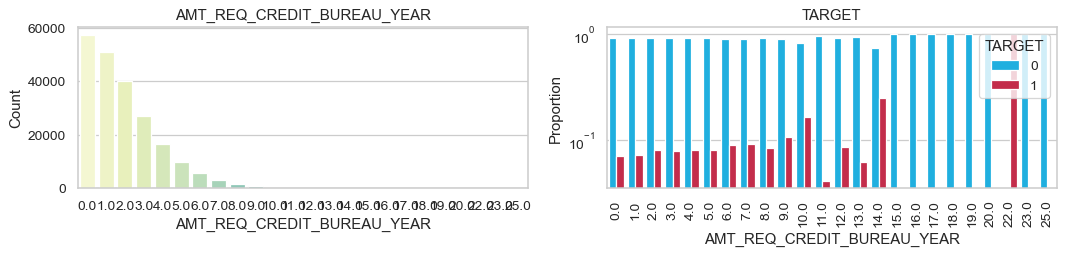

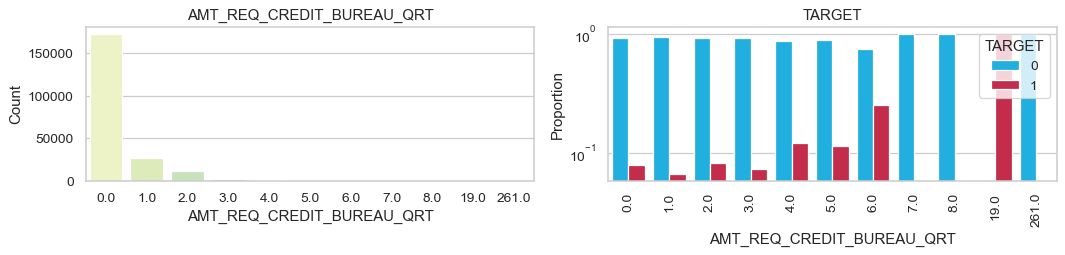

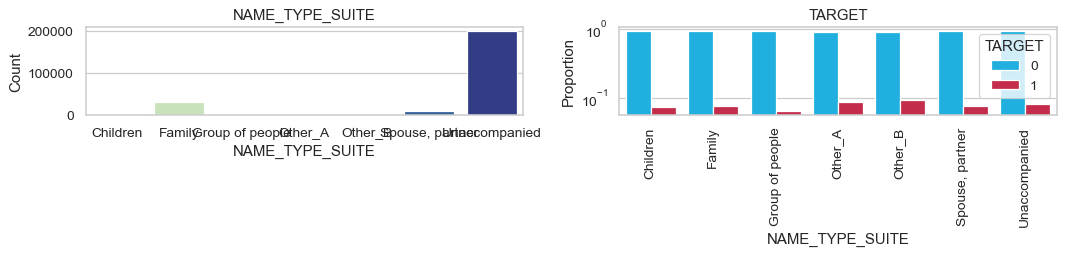

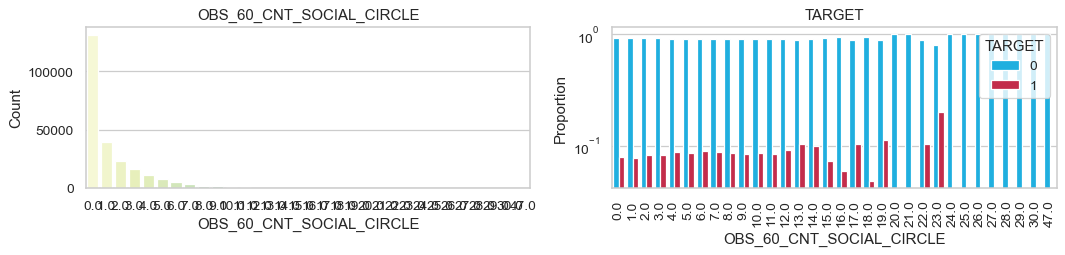

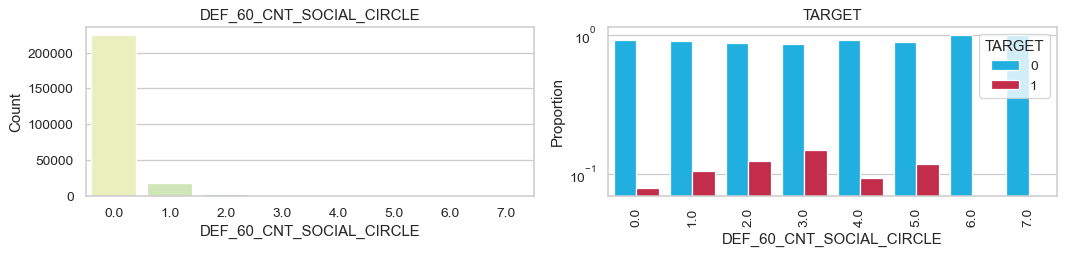

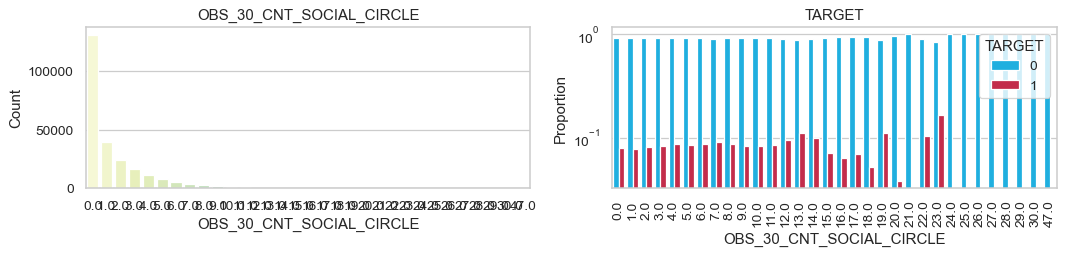

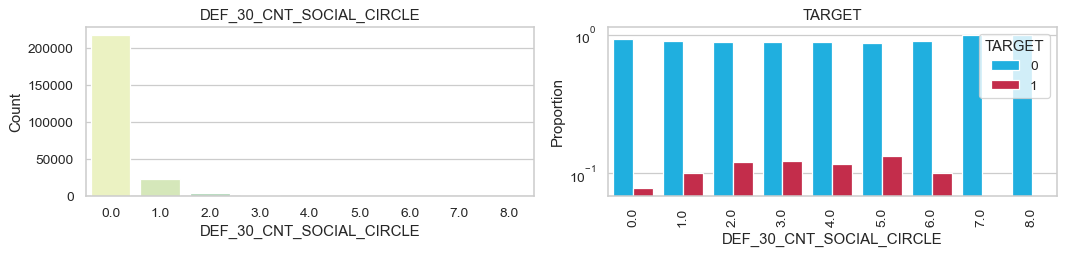

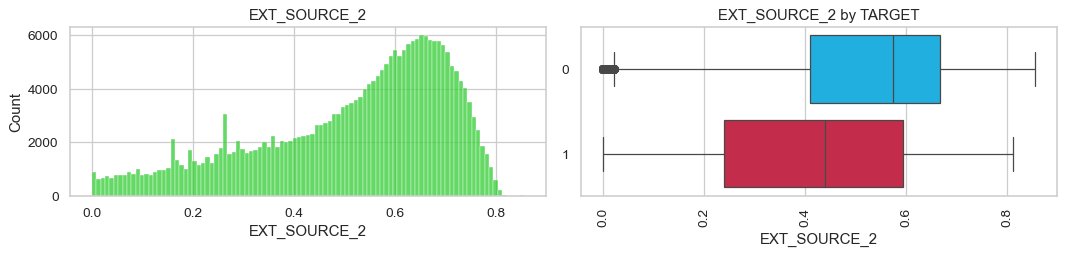

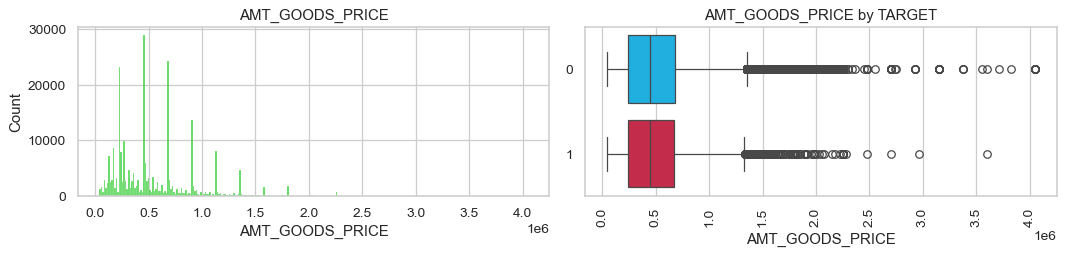

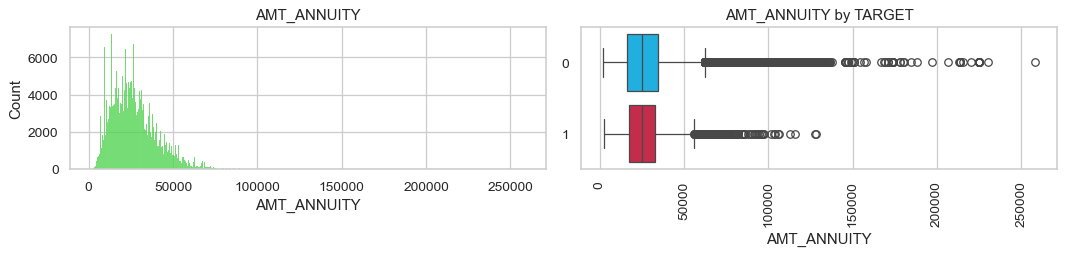

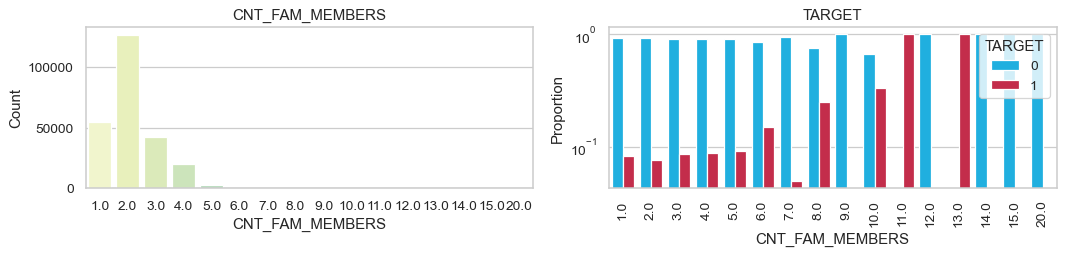

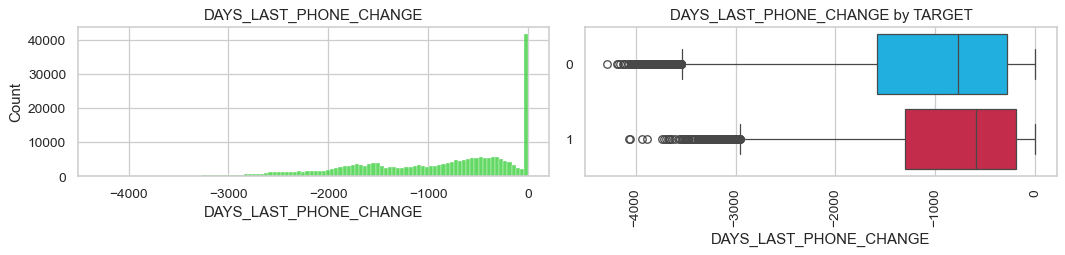

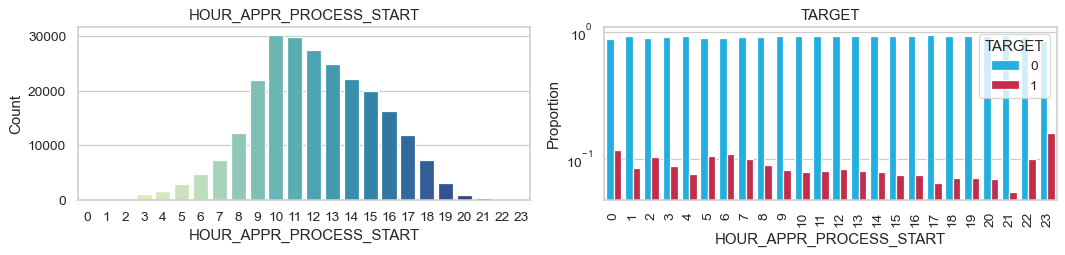

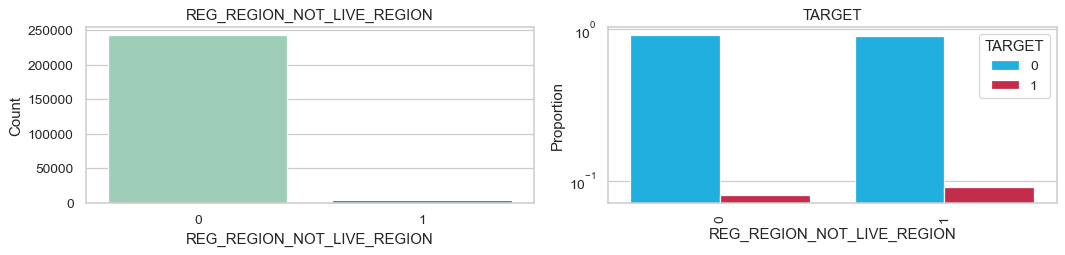

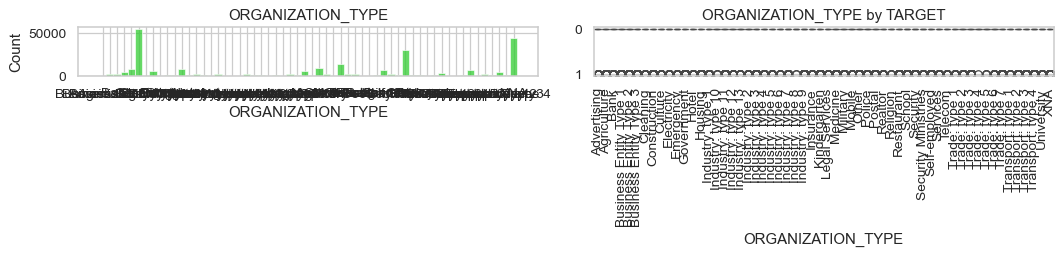

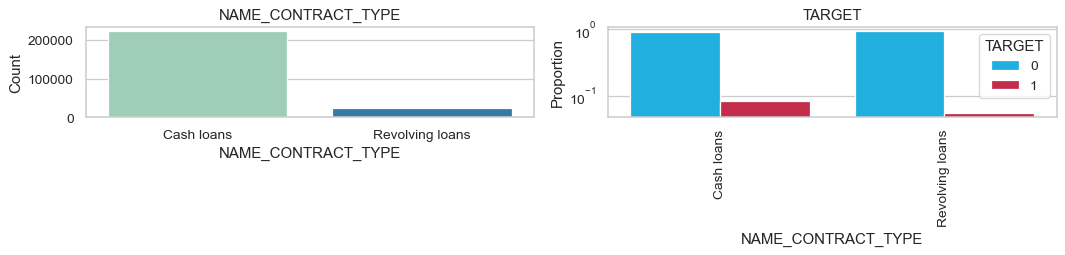

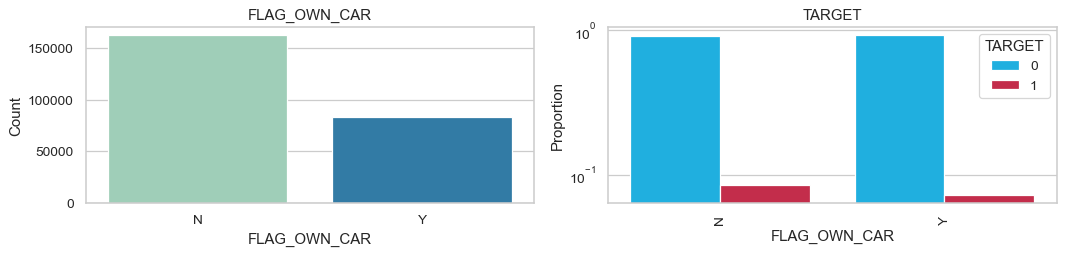

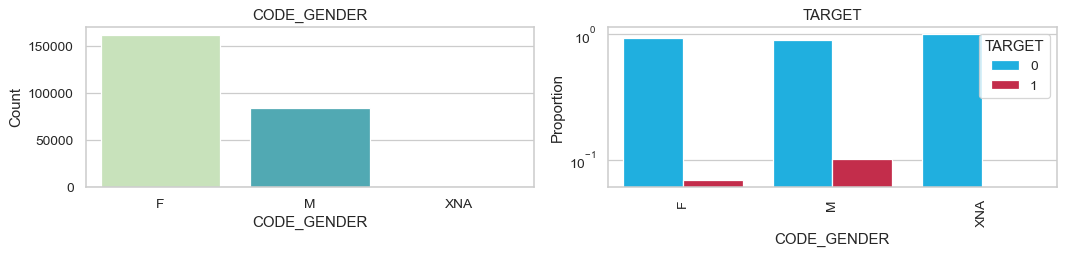

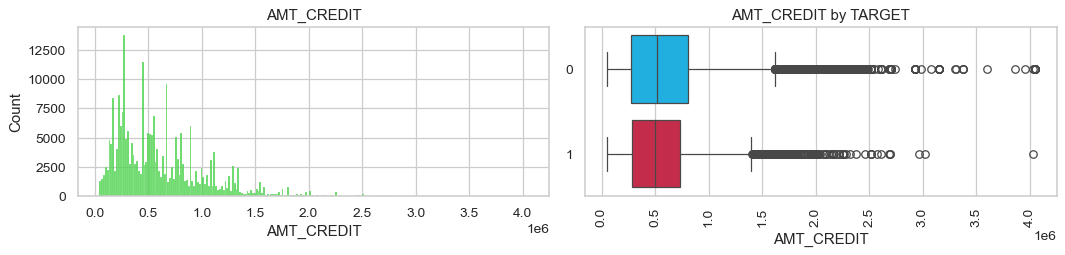

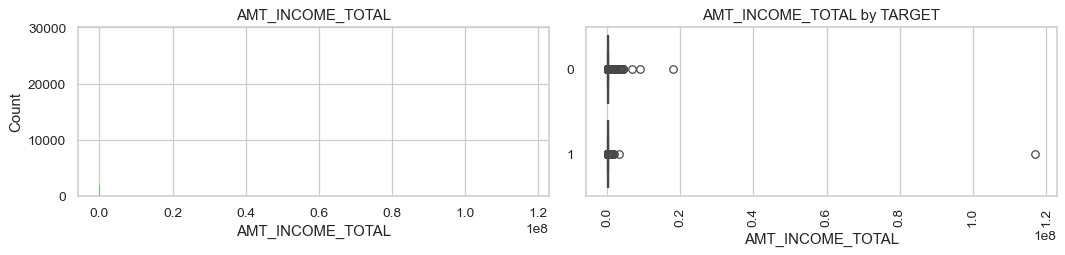

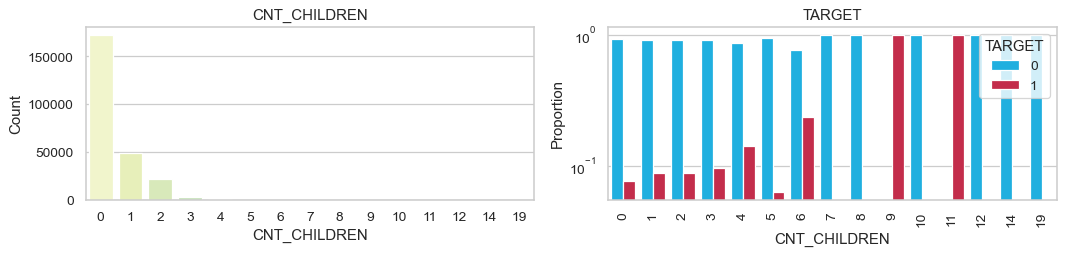

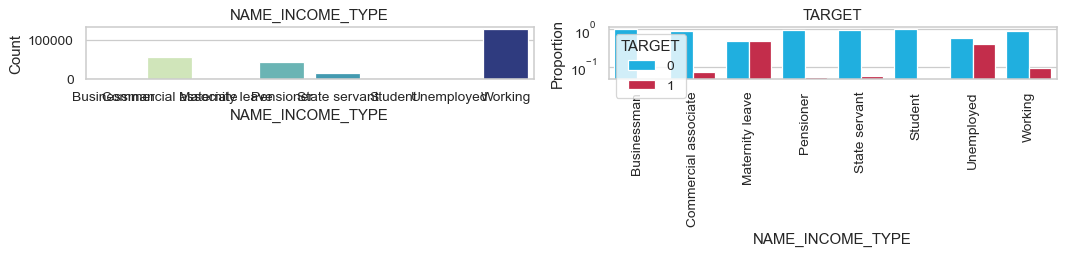

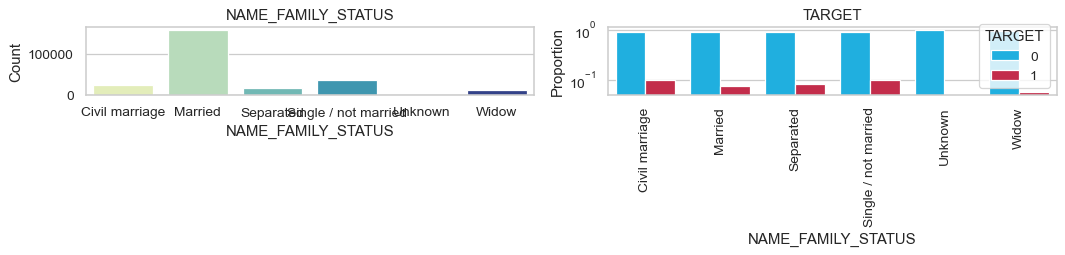

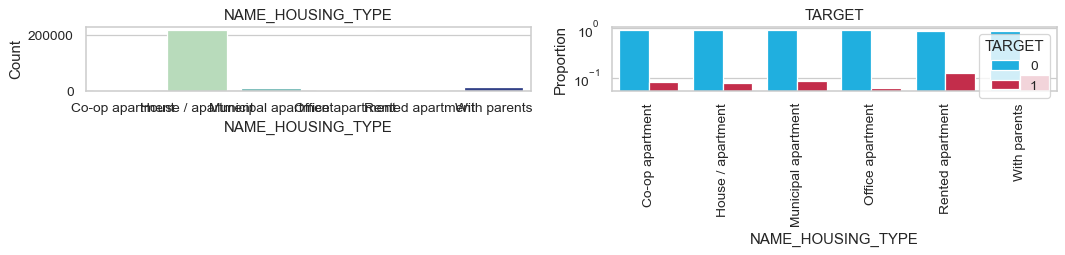

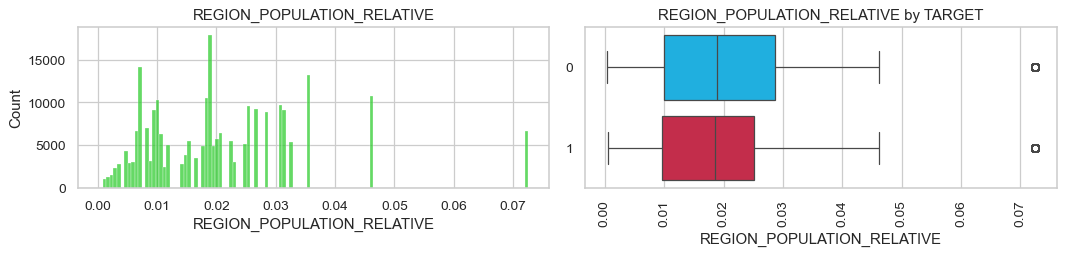

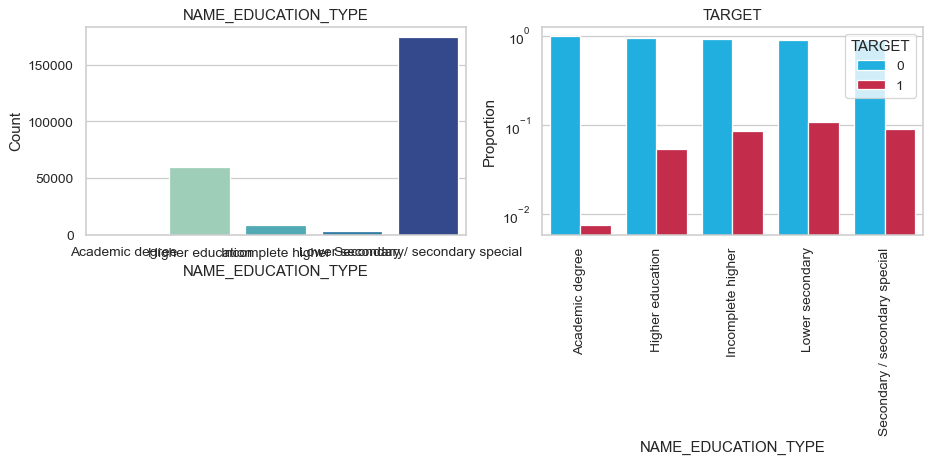

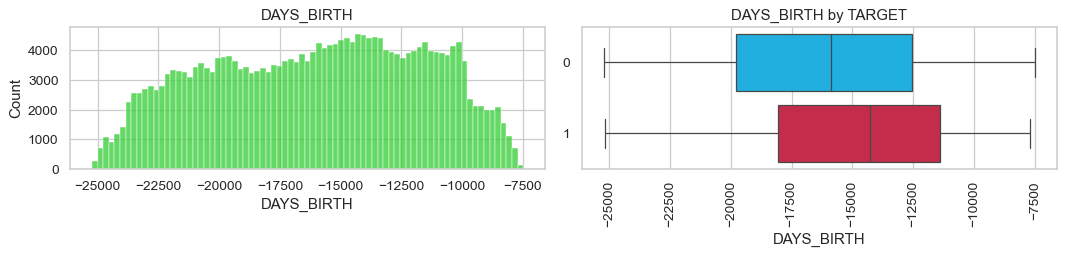

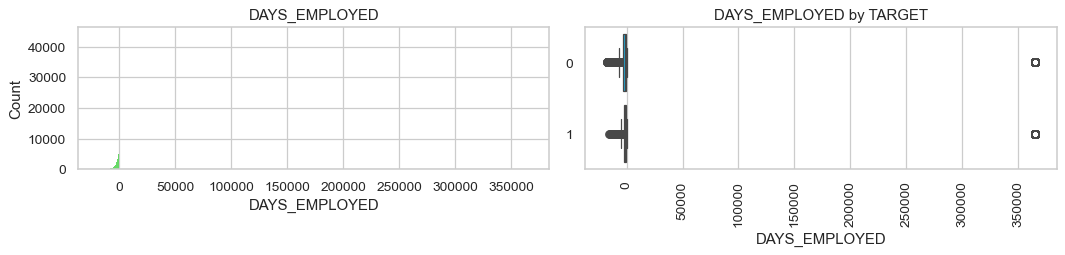

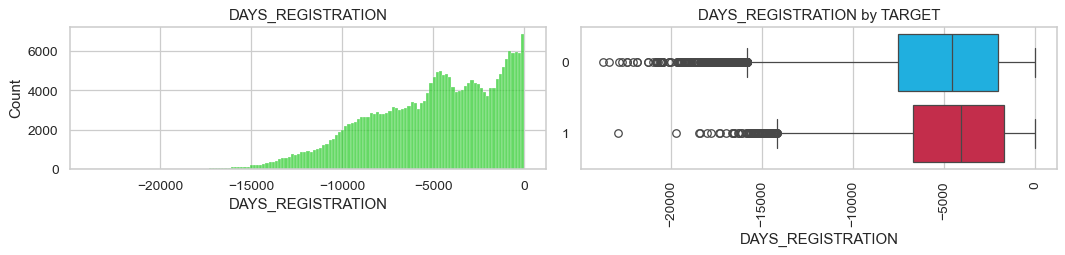

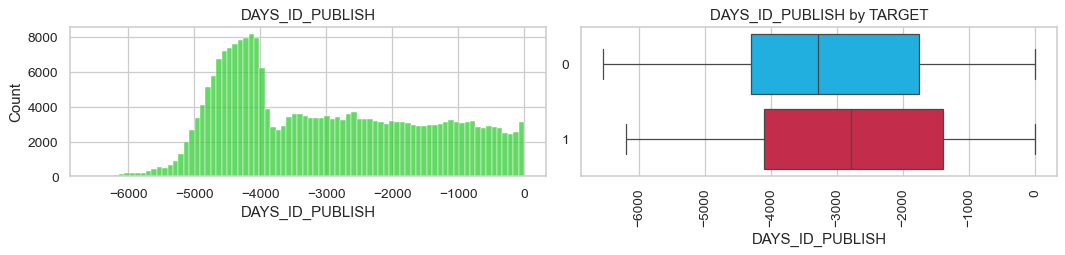

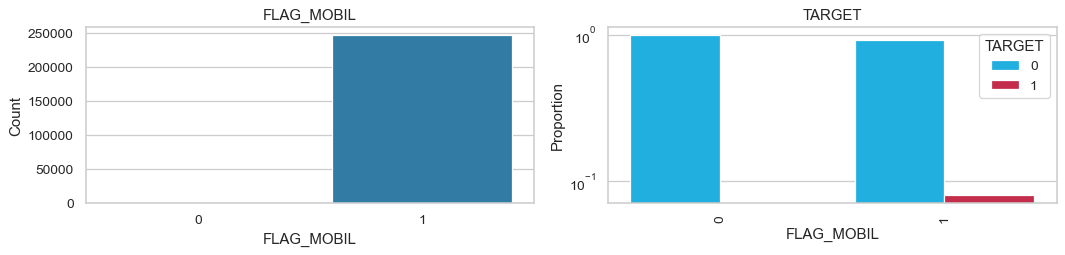

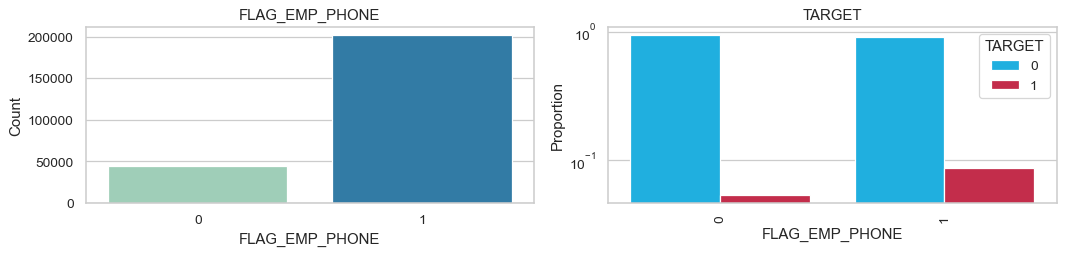

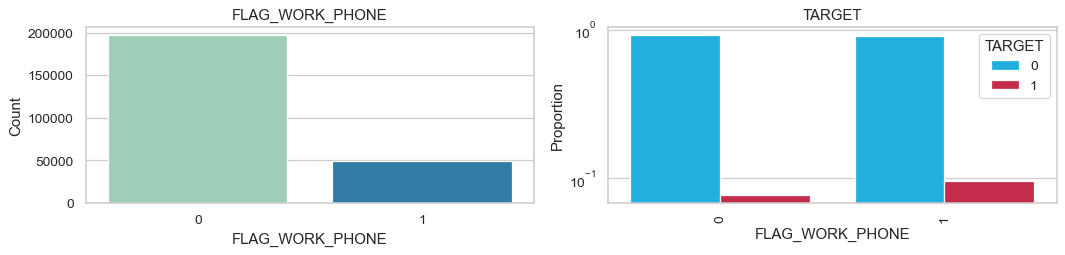

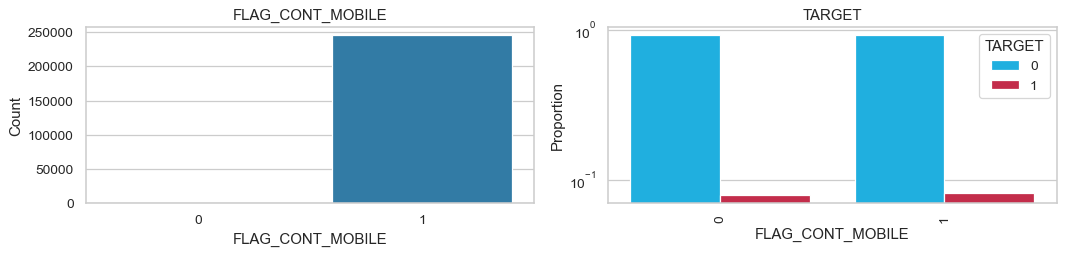

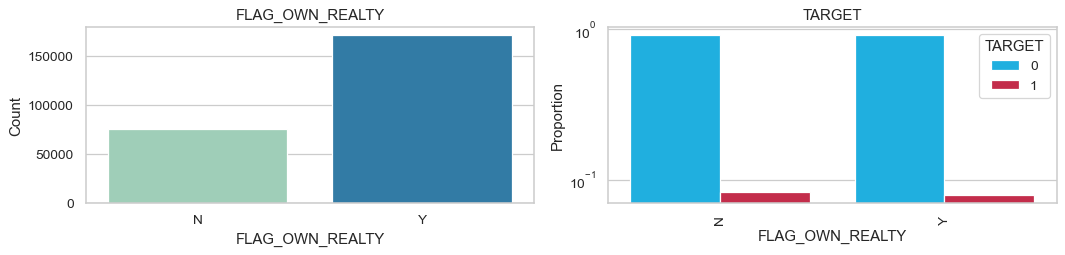

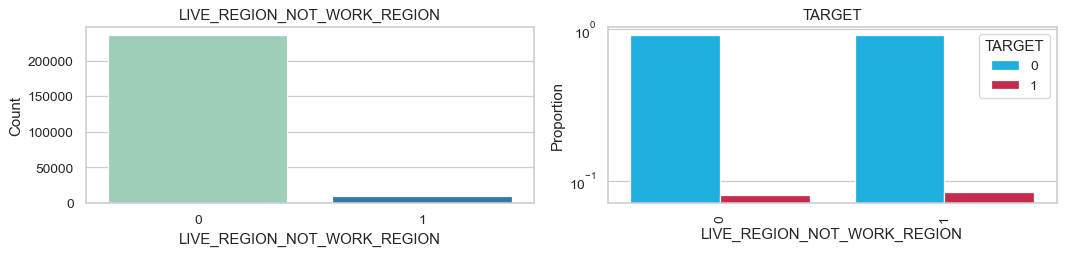

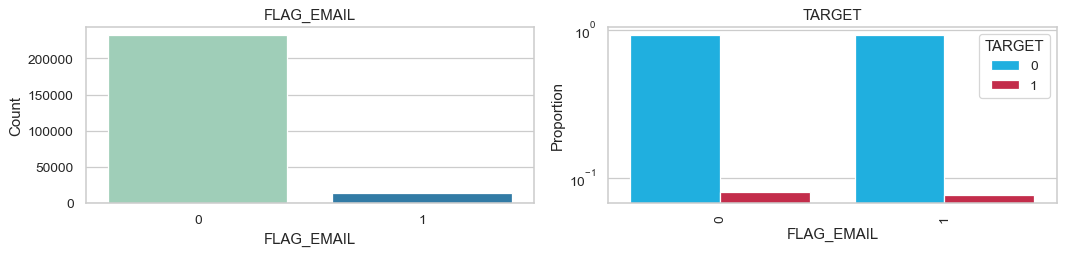

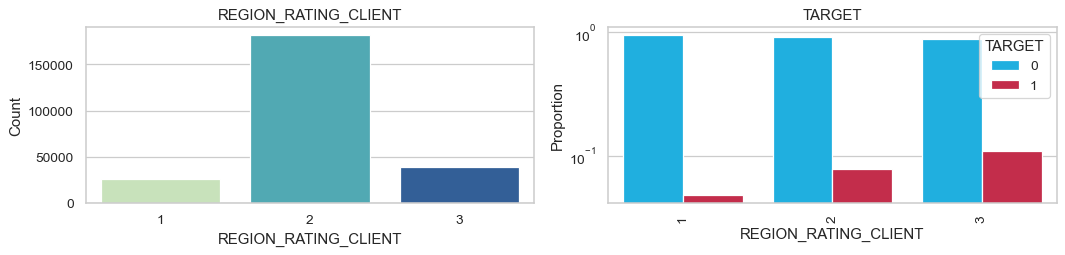

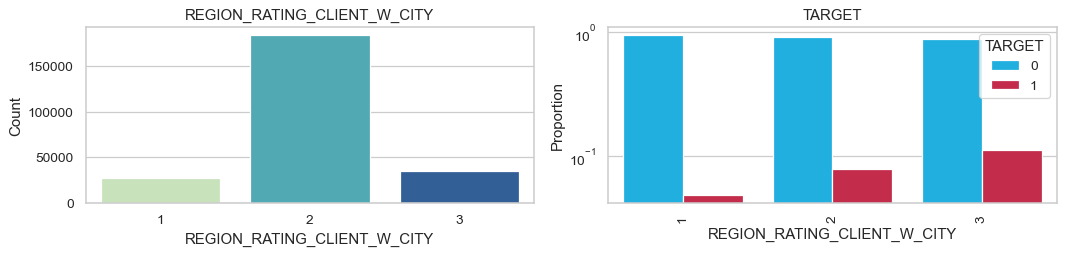

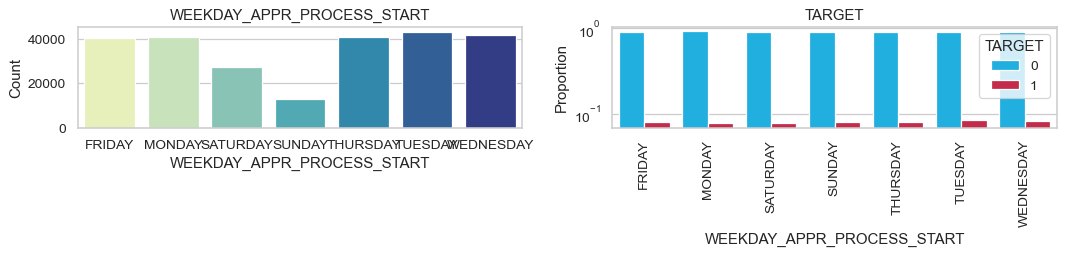

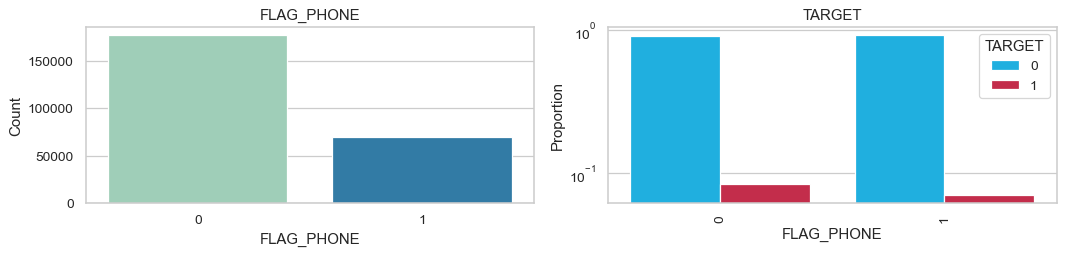

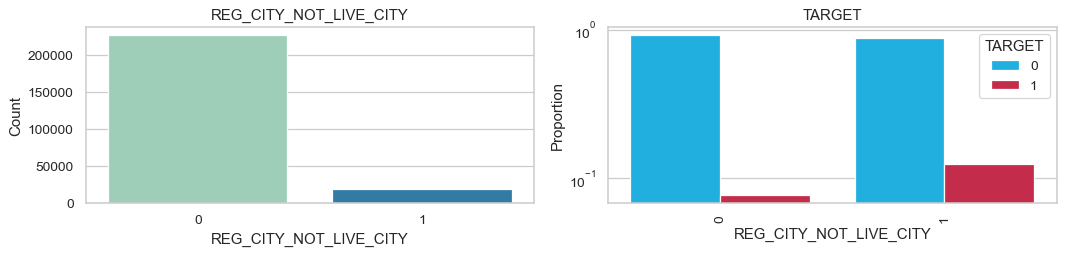

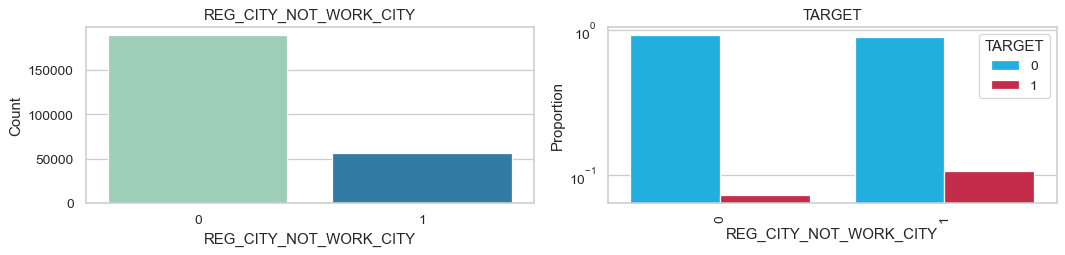

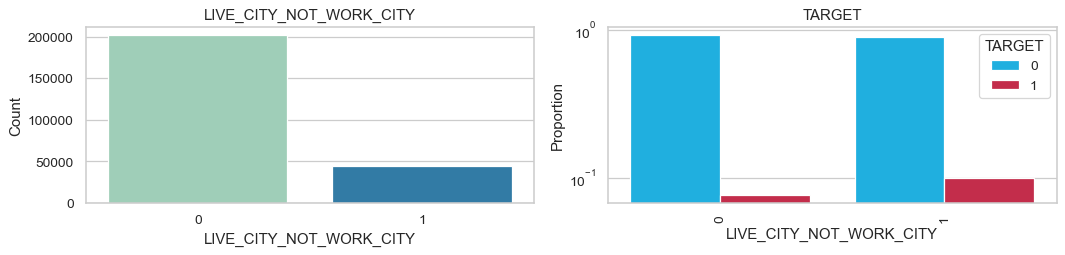

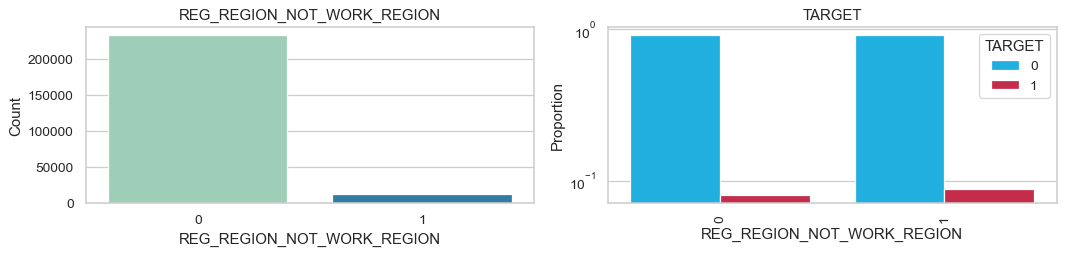

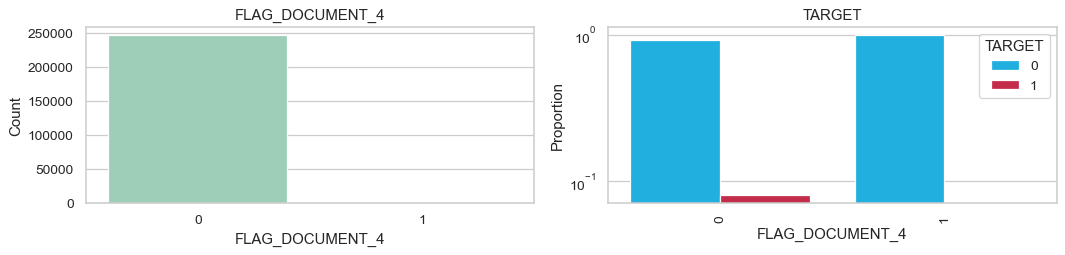

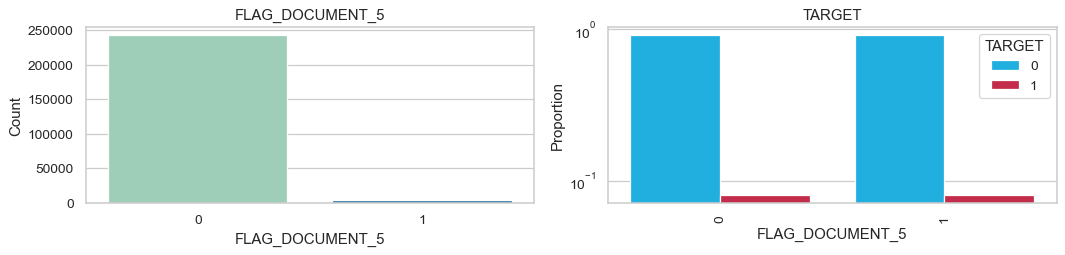

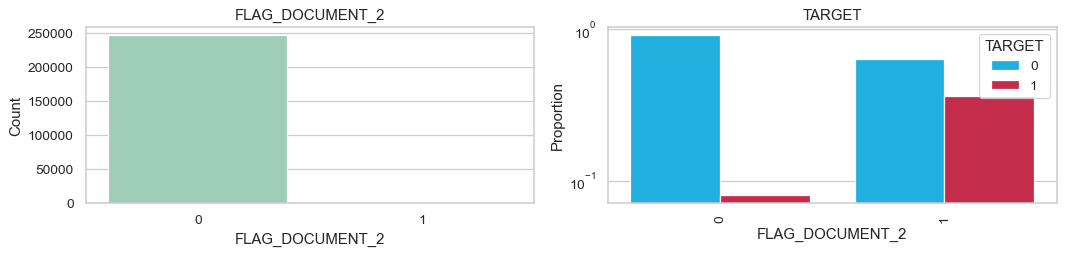

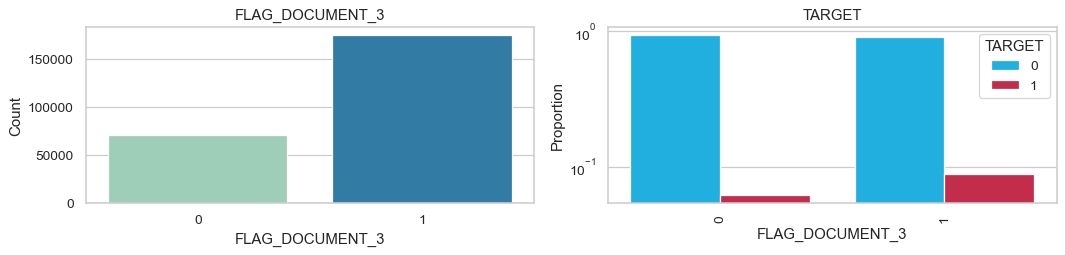

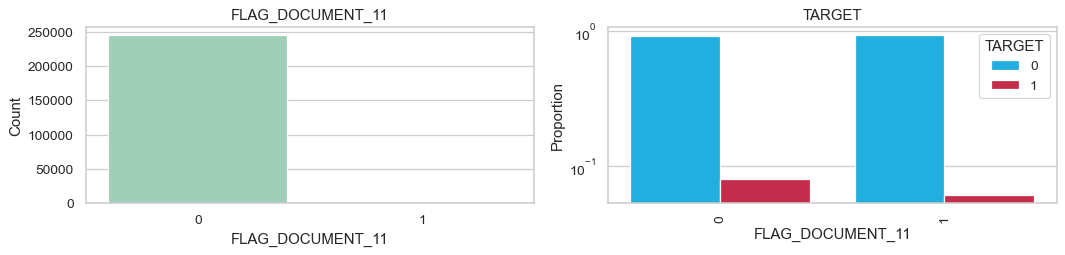

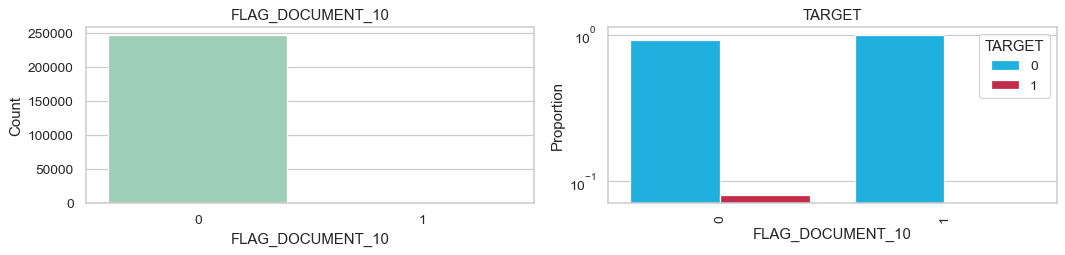

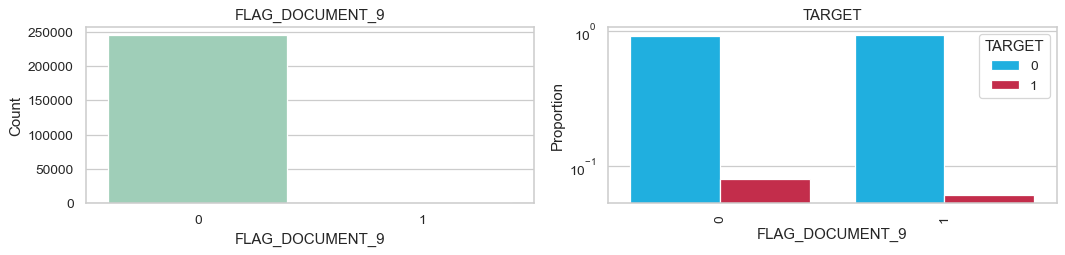

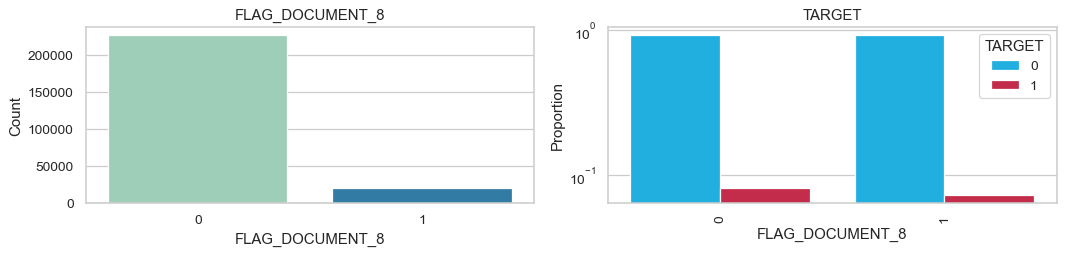

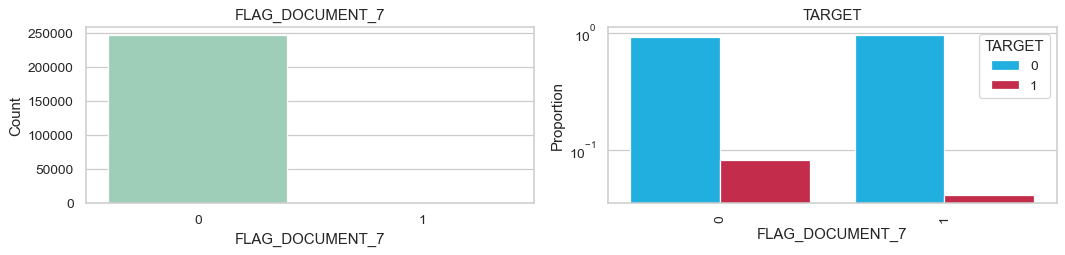

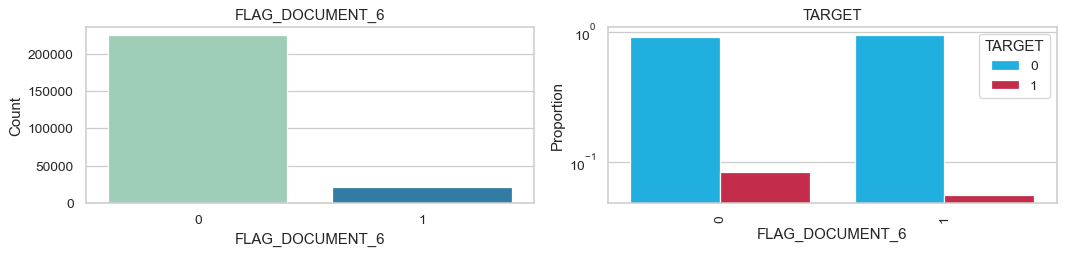

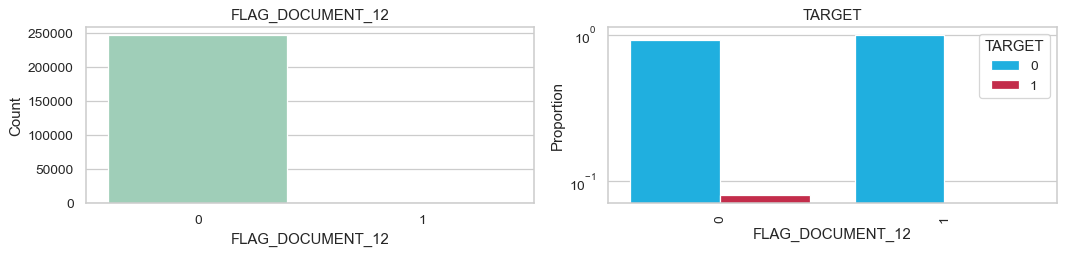

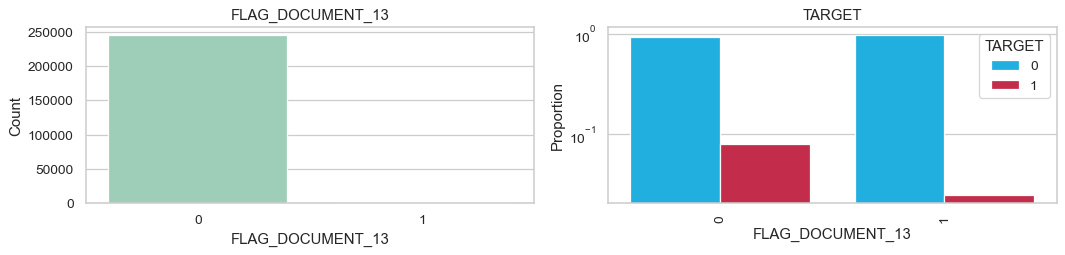

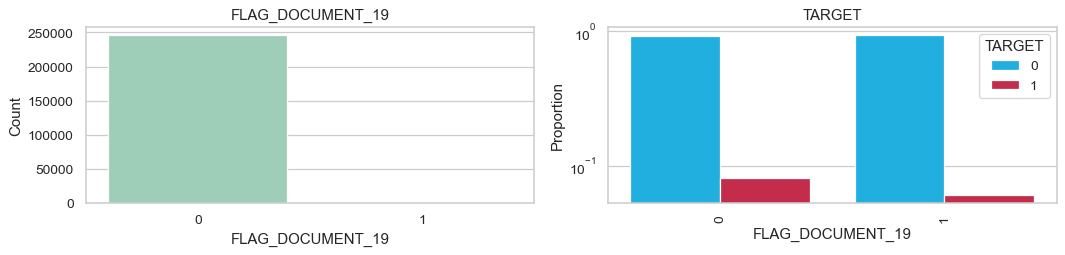

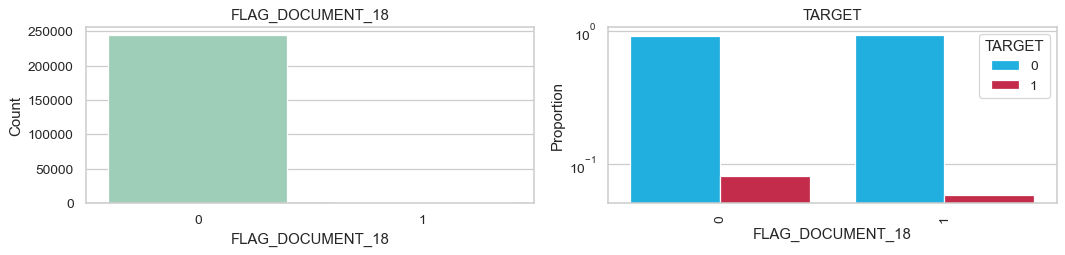

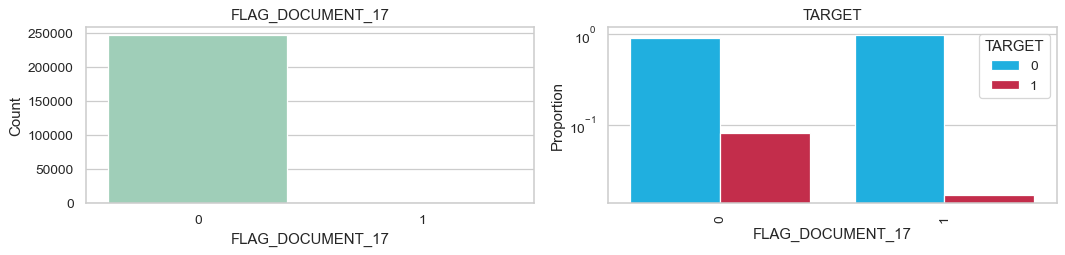

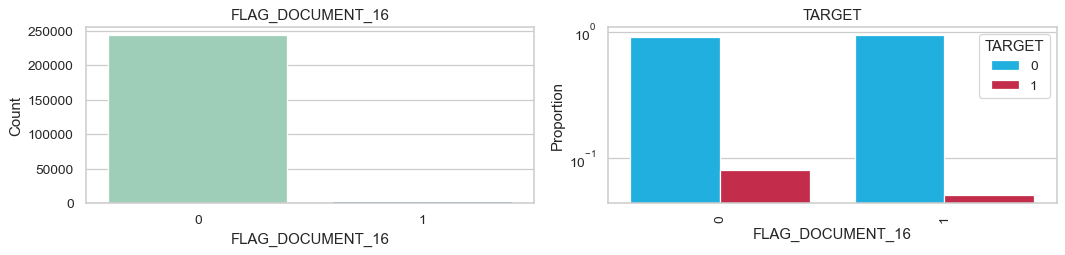

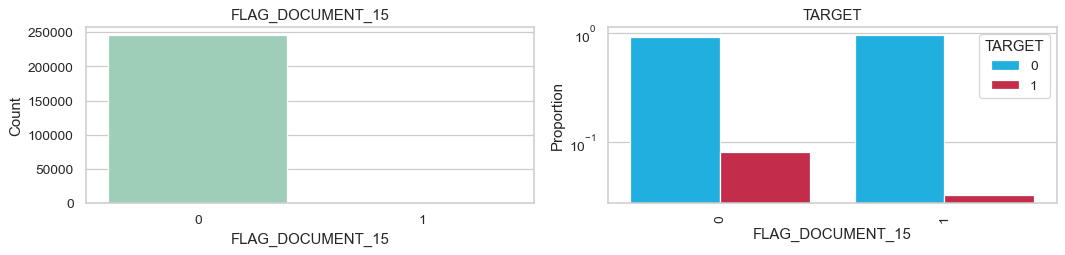

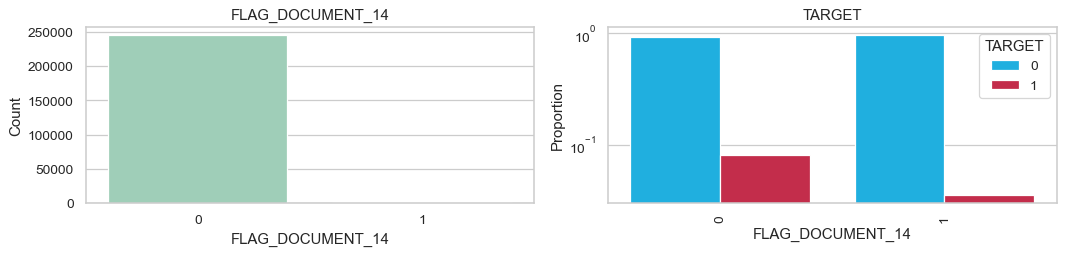

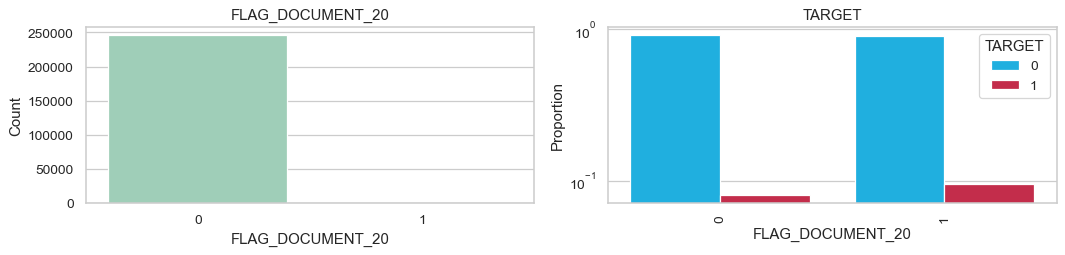

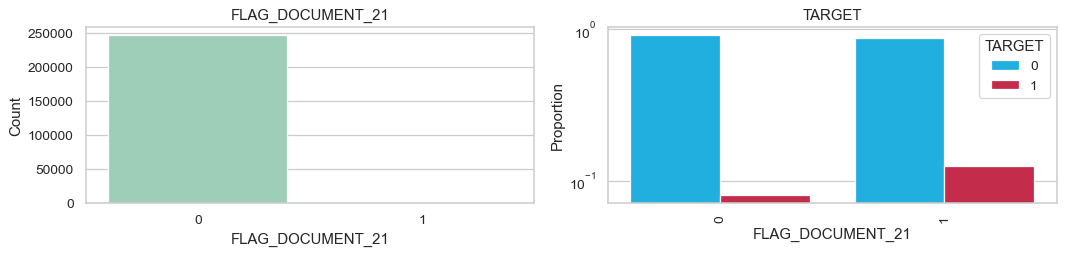

In [16]:
warnings.filterwarnings('ignore')
for i in list(df_loan_train.columns):
    if i in df_loan_num:
        f_aux.double_plot(df_loan_train, col_name=i, is_cont=True, target='TARGET')
    elif  ((i in df_loan_bool) | (i in df_loan_cat)) & (i!='TARGET'):
        f_aux.double_plot(df_loan_train, col_name=i, is_cont=False, target='TARGET')

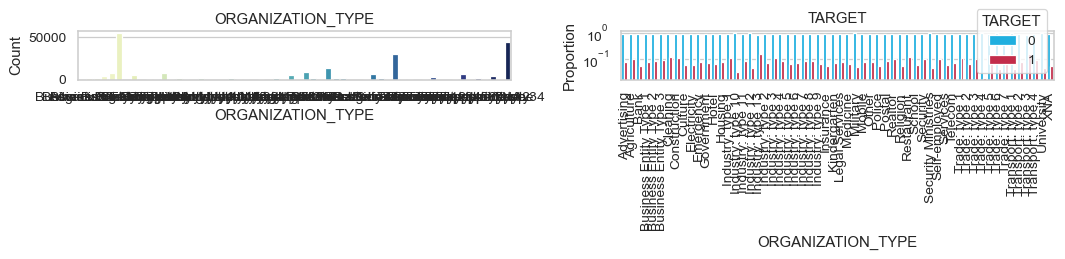

In [17]:
df_loan_train['ORGANIZATION_TYPE'] = df_loan_train['ORGANIZATION_TYPE'].astype('category')

f_aux.double_plot(df_loan_train, col_name='ORGANIZATION_TYPE', is_cont=False, target='TARGET')

### Análisis del gráfico

Cuando observamos las variables representadas visualmente, se dejan ver algunos detalles a tener en cuenta. Como el desbalanceo de la variable objetivo que ya había mencionado con anterioridad, o la cantidad de valores nulos de algunas variables que posteriormente transformaremos. Vamos a comentar el comportamiento de algunas variables en relación a nuestra variable objetivo TARGET.

1. Los clientes que tienen coches más antiguos se suelen retrasar en el pago del préstamo.
   
2. La dificultad en el pago del préstamo parece aumentar en los clientes con un score más bajo según la variable EXT_SOURCE_1, EXT_SOURCE_2 Y EXT_SOURCE_3 correspondiente a un score normalizado de una fuente de datos externa.

3. Los clientes con materiales de madera en las paredes de sus viviendas son los más propensos a retrasarse en el pago del préstamo.

4. Los clientes que tienen puestos de trabajo menos cualificados (low-skill laborers, drivers, waiters) presentan mayor probabilidad de retrasarse en el pago del préstamo.

5. Conforme aumenta el número de consultas de crédito antes de la solicitud del préstamo (AMT_REQ_CREDIT_BUREAU), más aumenta la probabilidad de que se retrase en la devolución del mismo.

6. Cuanto mayor es el tamaño de la familia del cliente más probabilidad en que se retrase en alguno de los pagos del préstamo.

7. Se puede observar que si el cliente cambió de teléfono móvil (DAYS_LAST_PHONE_CHANGE) hace relativamente poco tiempo, aumenta la probabilidad de que pueda tener dificultades en el pago del préstamo.

8. Los hombres son más propensos que las mujeres a tener dificultades en el pago del préstamo (CODE_GENDER).

9. Cuanto mayor sea la cantidad de hijos que tiene el cliente, mayor será la dificultad de pago que tendrá (CNT_CHILDREN).

10. Los clientes de baja por maternidad o desempleados son más propensos a tener dificultad en el pago del préstamo (NAME_INCOME_TYPE).

11. Los clientes con una mayor educación son menos propensos a tener dificultades a la hora de devolver el préstamo (NAME_EDUCATION_TYPE).

12. Parece que cuanto más jóven es el cliente (DAYS_BIRTH) tendrá más dificultades para el pago del préstamo.

13. Los clientes que cambiaron su documento de ID poco antes de solicitar el préstamo (DAYS_ID_PUBLISH), además de si cambió su registro (DAYS_REGISTRATION) poco antes de la solicitud del préstamo, tendrá más dificultades para el pago del mismo.

14. Cuanto mayor es el score de la región donde vive el cliente (REGION_RATING_CLIENT), mayor es la probabilidad de que tenga dificultades para el pago del préstamo.

15. Los clientes que dieron el FLAG_DOCUMENT_2 tienen mayor probabilidad de tener dificultades en el pago del préstamo.

## Tratamiento de variables continuas
### Tratamiento de outliers

In [18]:
f_aux.get_deviation_of_mean_perc(df_loan_train, list_var_continuous, target='TARGET', multiplier=3)

0.0       1.0                      variable  sum_outlier_values  \
0   0.954442  0.045558                COMMONAREA_AVG                1317   
1   0.953558  0.046442               COMMONAREA_MEDI                1335   
2   0.949962  0.050038               COMMONAREA_MODE                1319   
3   0.935264  0.064736       NONLIVINGAPARTMENTS_AVG                 587   
4   0.931389  0.068611      NONLIVINGAPARTMENTS_MEDI                 583   
5   0.925182  0.074818      NONLIVINGAPARTMENTS_MODE                 548   
6   0.951567  0.048433         LIVINGAPARTMENTS_MEDI                1404   
7   0.953305  0.046695          LIVINGAPARTMENTS_AVG                1392   
8   0.950912  0.049088         LIVINGAPARTMENTS_MODE                1426   
9   0.963351  0.036649                FLOORSMIN_MODE                 382   
10  0.963441  0.036559                 FLOORSMIN_AVG                 465   
11  0.961364  0.038636                FLOORSMIN_MEDI                 440   
12  0.920969  0.079031              YEARS_BUILD_MODE                 949   
13  0.921218  0.078782              YEARS_BUILD_MEDI                 952   
14  0.920298  0.079702               YEARS_BUILD_AVG                 941   
15  0.915503  0.084497                   OWN_CAR_AGE                2722   
16  0.941418  0.058582                 LANDAREA_MEDI                1707   
17  0.938360  0.061640                  LANDAREA_AVG                1671   
18  0.937830  0.062170                 LANDAREA_MODE                1705   
19  0.945765  0.054235             BASEMENTAREA_MODE                1641   
20  0.946727  0.053273              BASEMENTAREA_AVG                1558   
21  0.946599  0.053401             BASEMENTAREA_MEDI                1573   
22  0.944530  0.055470             NONLIVINGAREA_AVG                1947   
23  0.945399  0.054601            NONLIVINGAREA_MODE                1978   
24  0.945212  0.054788            NONLIVINGAREA_MEDI                1953   
25  0.957623  0.042377                ELEVATORS_MEDI                1935   
26  0.958355  0.041645                 ELEVATORS_AVG                1945   
27  0.951776  0.048224                ELEVATORS_MODE                2675   
28  0.951858  0.048142                APARTMENTS_AVG                2368   
29  0.951209  0.048791               APARTMENTS_MODE                2398   
30  0.951300  0.048700               APARTMENTS_MEDI                2423   
31  0.937675  0.062325                ENTRANCES_MEDI                1781   
32  0.941121  0.058879                ENTRANCES_MODE                2106   
33  0.938453  0.061547                 ENTRANCES_AVG                1771   
34  0.951859  0.048141                LIVINGAREA_AVG                2555   
35  0.949461  0.050539               LIVINGAREA_MODE                2691   
36  0.952177  0.047823               LIVINGAREA_MEDI                2572   
37  0.959376  0.040624                FLOORSMAX_MODE                2117   
38  0.957955  0.042045                 FLOORSMAX_AVG                2093   
39  0.958106  0.041894                FLOORSMAX_MEDI                2196   
40  0.908411  0.091589  YEARS_BEGINEXPLUATATION_MODE                 535   
41  0.910584  0.089416   YEARS_BEGINEXPLUATATION_AVG                 548   
42  0.904854  0.095146  YEARS_BEGINEXPLUATATION_MEDI                 515   
43  0.958506  0.041494                TOTALAREA_MODE                2651   
44  0.925448  0.074552    AMT_REQ_CREDIT_BUREAU_WEEK                6814   
45  0.946082  0.053918     AMT_REQ_CREDIT_BUREAU_MON                2578   
46  0.924266  0.075734    AMT_REQ_CREDIT_BUREAU_HOUR                1294   
47  0.914095  0.085905     AMT_REQ_CREDIT_BUREAU_DAY                1199   
48  0.907767  0.092233    AMT_REQ_CREDIT_BUREAU_YEAR                2678   
49  0.913961  0.086039     AMT_REQ_CREDIT_BUREAU_QRT                1848   
50  0.913829  0.086171      OBS_60_CNT_SOCIAL_CIRCLE                4816   
51  0.874327  0.125673      DEF_60_CNT_SOCIAL_CIRCLE     

- Las variables a destacar son 'AMT_CREDIT' siendo la cantidad total de dinero prestado al cliente y 'AMT_INCOME_TOTAL' siendo el ingreso total del cliente, pues estos valores pueden representar una importancia relativa en la variable 'TARGET'. Si tenemos en cuenta que el valor de nuestra variable target es que exista aproximadamente un 8% de dificultad de pago, no tendremos que preocuparnos por la cantidad de outliers que tenemos. La cantidad de outliers habrá que tenerla en cuenta pero a priori no deberían de afectar a las conclusiones finales debido a la cantidad tan reducida.

En otra instancia, destacar que los porcentajes de outliers son muy bajos prácticamente en todas las variables y no deberían de afectar significativamente a los resultados por lo que, por ahora procederé a mantenerlos.

### Análisis de correlación entre las variables

#### Matriz de correlación para variables numéricas

In [19]:
corr = pd.concat([df_loan_train.select_dtypes('number').drop(df_loan_bool, axis=1), df_loan_train['TARGET']], axis=1).corr(method='pearson')
corr

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  \
SK_ID_CURR                      1.000000       -0.000618        -0.000306   
COMMONAREA_AVG                 -0.000618        1.000000         0.995723   
COMMONAREA_MEDI                -0.000306        0.995723         1.000000   
COMMONAREA_MODE                -0.000235        0.976990         0.980186   
NONLIVINGAPARTMENTS_AVG        -0.004044        0.104080         0.104108   
NONLIVINGAPARTMENTS_MEDI       -0.004488        0.103623         0.104648   
NONLIVINGAPARTMENTS_MODE       -0.003741        0.101982         0.103190   
LIVINGAPARTMENTS_MEDI           0.003474        0.532262         0.535049   
LIVINGAPARTMENTS_AVG            0.003429        0.530703         0.531468   
LIVINGAPARTMENTS_MODE           0.004078        0.523296         0.526520   
FLOORSMIN_MODE                  0.003772        0.287190         0.285829   
FLOORSMIN_AVG                   0.004766        0.294760         0.293205   
FLOORSMIN_MEDI                  0.004513        0.294020         0.292670   
YEARS_BUILD_MODE                0.007333        0.226436         0.227598   
YEARS_BUILD_MEDI                0.007869        0.229366         0.230334   
YEARS_BUILD_AVG                 0.008118        0.229621         0.230275   
OWN_CAR_AGE                     0.000983       -0.038274        -0.037959   
LANDAREA_MEDI                   0.003210        0.254899         0.257784   
LANDAREA_AVG                    0.002934        0.253077         0.255666   
LANDAREA_MODE                   0.003035        0.240619         0.244055   
BASEMENTAREA_MODE              -0.000687        0.383025         0.386034   
BASEMENTAREA_AVG               -0.001218        0.401366         0.402608   
BASEMENTAREA_MEDI              -0.001100        0.400316         0.402752   
EXT_SOURCE_1                   -0.000098        0.032502         0.031532   
NONLIVINGAREA_AVG               0.002460        0.227503         0.227796   
NONLIVINGAREA_MODE              0.001556        0.215756         0.217994   
NONLIVINGAREA_MEDI              0.001669        0.227223         0.229016   
ELEVATORS_MEDI                  0.005666        0.518537         0.520443   
ELEVATORS_AVG                   0.005552        0.520095         0.520169   
ELEVATORS_MODE                  0.005788        0.501695         0.503396   
APARTMENTS_AVG                  0.001911        0.536826         0.537877   
APARTMENTS_MODE                 0.002158        0.511312         0.514492   
APARTMENTS_MEDI                 0.002255        0.536078         0.539034   
ENTRANCES_MEDI                 -0.002076        0.322824         0.325659   
ENTRANCES_MODE                 -0.002179        0.299515         0.302568   
ENTRANCES_AVG                  -0.002377        0.325433         0.327092   
LIVINGAREA_AVG                  0.003940        0.544066         0.545263   
LIVINGAREA_MODE                 0.004250        0.519428         0.522608   
LIVINGAREA_MEDI                 0.004374        0.542972         0.545882   
FLOORSMAX_MODE                  0.005201        0.395279         0.394667   
FLOORSMAX_AVG                   0.005760        0.401736         0.400655   
FLOORSMAX_MEDI                  0.005355        0.400223         0.399626   
YEARS_BEGINEXPLUATATION_MODE    0.002445        0.050956         0.051044   
YEARS_BEGINEXPLUATATION_AVG     0.002513        0.095025         0.095260   
YEARS_BEGINEXPLUATATION_MEDI    0.002298        0.078857         0.079089   
TOTALAREA_MODE                  0.003307        0.550656         0.550483   
EXT_SOURCE_3                   -0.000007       -0.005499        -0.005625   
AMT_REQ_CREDIT_BUREAU_WEEK      0.001299       -0.009497        -0.009552   
AMT_REQ_CREDIT_BUREAU_MON       0.000227        0.022451         0.022149   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.002844        0.006416         0.006569   
AMT_REQ_CREDIT_BUREAU_DAY      -0.001018       -0.000265        -0.000085   
AMT_REQ_CREDIT_BUREAU_YEAR

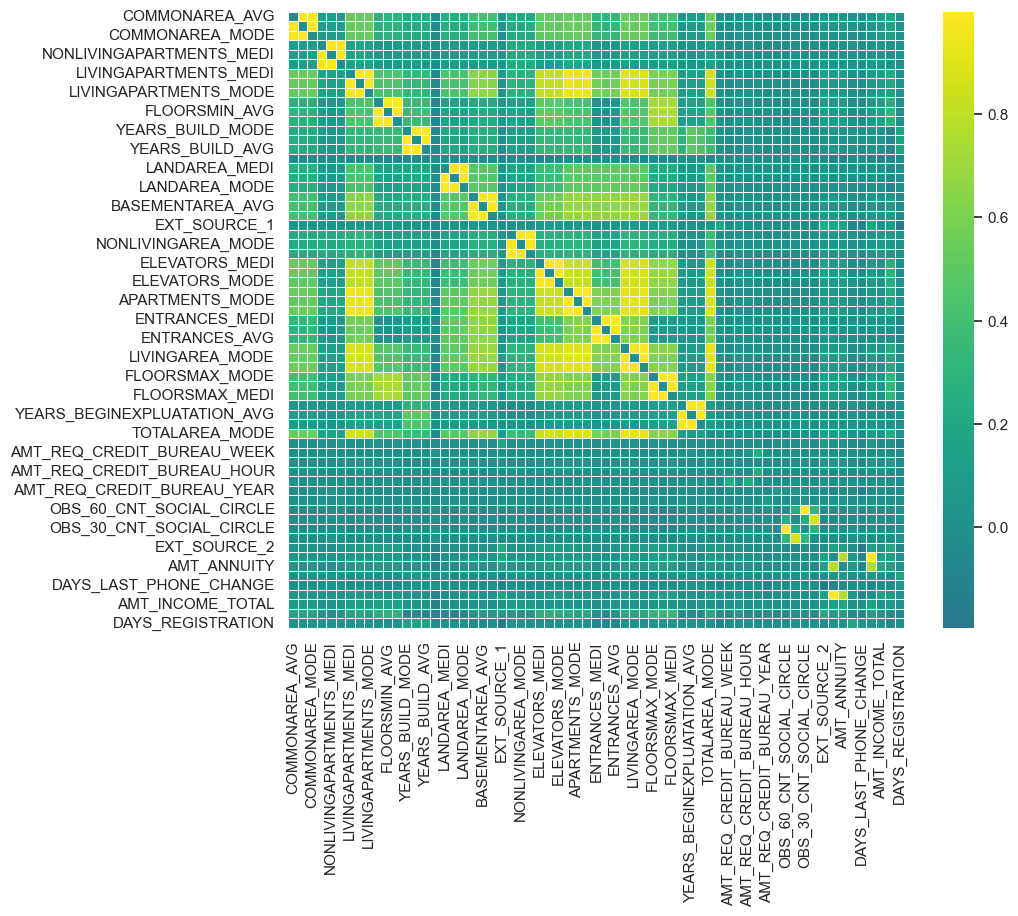

0

In [20]:
f_aux.get_corr_matrix(dataset = df_loan_train[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

De las correlaciones observadas me gustaría destacar dos de ellas:

1. Observamos como AMT_CREDIT y AMT_ANNUITY tienen una correlación positiva del 77%, es decir, si aumenta la cantidad de dinero prestado al cliente, aumenta la anualidad de la solicitud anterior.

2. AMT_CREDIT Y AMT_GOOD_PRICES presentan una correlación lineal positiva del 99%, es decir, cuanto mayor es cantidad prestada al cliente, mayor es el valor de sus bienes para los que se le ha concedido el préstamo. Esto es algo lógico.

Además de estas dos correlaciones, la variable 'TARGET' no está altamente correlacionada y no hay variables que expliquen el comportamiento de nuestra variable objetivo.

In [21]:
corr.loc['TARGET'].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.078418
REGION_RATING_CLIENT_W_CITY     0.059963
REGION_RATING_CLIENT            0.058141
DAYS_LAST_PHONE_CHANGE          0.054953
DAYS_ID_PUBLISH                 0.051695
DAYS_REGISTRATION               0.040217
OWN_CAR_AGE                     0.039531
DEF_30_CNT_SOCIAL_CIRCLE        0.031837
DEF_60_CNT_SOCIAL_CIRCLE        0.029870
CNT_CHILDREN                    0.019552
AMT_REQ_CREDIT_BUREAU_YEAR      0.018896
CNT_FAM_MEMBERS                 0.010330
OBS_30_CNT_SOCIAL_CIRCLE        0.009272
OBS_60_CNT_SOCIAL_CIRCLE        0.009144
AMT_REQ_CREDIT_BUREAU_DAY       0.000813
AMT_REQ_CREDIT_BUREAU_HOUR     -0.000547
SK_ID_CURR                     -0.000581
AMT_REQ_CREDIT_BUREAU_WEEK     -0.001428
NONLIVINGAPARTMENTS_MODE       -0.001785
AMT_REQ_CREDIT_BUREAU_QRT      -0.002230
AMT_INCOME_TOTAL               -0.002481
NONLIVINGAPARTMENTS_MEDI       -0.002904
NONLIVINGAPARTMENTS_AVG        -0.003702
YEARS_BEGINEXPLU

Ninguna variable explica de una manera muy grande a la variable Target, algo que parece normal en un problema tan complejo como es la detección de dificultad en pago de préstamos.


## Tratamiento de valores nulos

El tratamiento de valores nulos depende del contexto en el que estemos trabajando, la naturaleza de los datos y el impacto que los valores ausentes pueden tener en tu análisis o modelo de machine learning. En general hay varias opciones a la hora de imputar nuestros valores nulos:

1. Imputar los valores numéricos mediante la media si nuestras variables siguen una distribución normal o mediante la mediana cuando presenten valores atípicos. Imputar un valor fijo o predeterminado, o utilizar un algoritmo de imputación avanzada (KNN) que predice los valores ausentes en función de los valores de otras columnas.

2. Imputar los valores categóricos mediante la moda cuando las variables presentan valores dominantes, asignar un valor fijo como pudiera ser 'Desconocido'.

En mi caso, al no tener mucho contexto de las variables, decidiré imputar los valores nulos de las variables categóricas por un valor fijo 'Desconocido' ya que realmente no conocemos la naturaleza de esos valores nulos. Prefiero no imputar por moda, ya que en algunas variables categóricas realmente no observamos un valor predominante sobre los demás, por lo que podríamos distorsionar la distribución de dichas variables.

En el caso de las numéricas, optaré por imputar la mediana ya que la mayoría de las variables numéricas no siguen una distribución normal y a pesar de no presentar un gran porcentaje de valores atípicos la mediana no se ve afectada por valores extremos, a diferencia de la media. Además, los modelos de machine learning suelen ser sensibles a valores extremos. Usar la mediana reduce la posibilidad de que los valores imputados introduzcan ruido o sesgo no deseado.

En el caso de las variables booleanas, variables que toman el valor 0 o 1, si que optaré por imputar su moda, ya que no tiene sentido imputar por su mediana si verdaderamente su distribución toman dos únicos valores.

In [22]:
list_cat_vars, other = f_aux.dame_variables_categoricas(dataset=df_loan_train)

# Nos aseguramos de que las columnas categóricas permitan la categoría 'Desconocido'
for col in list_cat_vars:
    if pd.api.types.is_categorical_dtype(df_loan_train[col]):
        # Agregar 'Desconocido' como categoría si no existe
        df_loan_train[col] = df_loan_train[col].cat.add_categories(['Desconocido'])

# Imputar valores nulos con 'Desconocido'
df_loan_train[list_cat_vars] = df_loan_train[list_cat_vars].fillna(value='Desconocido')


df_loan_train[list_cat_vars]

FONDKAPREMONT_MODE WALLSMATERIAL_MODE  HOUSETYPE_MODE  \
238851        Desconocido        Desconocido     Desconocido   
181603        Desconocido       Stone, brick  block of flats   
63661    reg oper account       Stone, brick  block of flats   
122457   reg oper account       Stone, brick  block of flats   
70875         Desconocido              Block  block of flats   
...                   ...                ...             ...   
216116   reg oper account       Stone, brick  block of flats   
168796        Desconocido       Stone, brick  block of flats   
241375        Desconocido        Desconocido     Desconocido   
297753   reg oper account              Panel  block of flats   
108462        Desconocido        Desconocido     Desconocido   

       EMERGENCYSTATE_MODE       OCCUPATION_TYPE NAME_TYPE_SUITE  \
238851         Desconocido              Laborers   Unaccompanied   
181603                  No           Sales staff   Unaccompanied   
63661                   No           Sales staff          Family   
122457                  No           Sales staff   Unaccompanied   
70875                   No               Drivers   Unaccompanied   
...                    ...                   ...             ...   
216116                  No              Laborers   Unaccompanied   
168796                  No           Sales staff          Family   
241375         Desconocido            Core staff   Unaccompanied   
297753                  No  Waiters/barmen staff   Unaccompanied   
108462         Desconocido              Laborers   Unaccompanied   

             ORGANIZATION_TYPE NAME_CONTRACT_TYPE FLAG_OWN_CAR CODE_GENDER  \
238851  Business Entity Type 1    Revolving loans            N           M   
181603           Self-employed         Cash loans            Y           F   
63661   Business Entity Type 3         Cash loans            N           F   
122457        Industry: type 6         Cash loans            N           F   
70875                    Other         Cash loans            Y           M   
...                        ...                ...          ...         ...   
216116           Self-employed         Cash loans            Y           M   
168796  Business Entity Type 3         Cash loans            N           F   
241375  Business Entity Type 1         Cash loans            N           F   
297753           Self-employed         Cash loans            N           F   
108462  Business Entity Type 2         Cash loans            N           F   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
238851               Working  Single / not married  House / apartment   
181603               Working               Married  House / apartment   
63661   Commercial associate               Married  House / apartment   
122457               Working        Civil marriage  House / apartment   
70875   Commercial associate               Married  House / apartment   
...                      ...                   ...                ...   
216116               Working               Married  House / apartment   
168796  Commercial associate               Married  House / apartment   
241375  Commercial associate  Single / not married  House / apartment   
297753               Working               Married  House / apartment   
108462               Working               Married  House / apartment   

                  NAME_EDUCATION_TYPE FLAG_OWN_REALTY  \
238851  Secondary / secondary special               N   
181603  Secondary / secondary special               N   
63661   Secondary / secondary special               Y   
122457  Secondary / secondary special               Y   
70875   Secondary / secondary special               Y   
...                               ...             ...   
216116  Secondary / secondary special               N   
168796               Higher education               Y   
241375  Secondary / secondary special               N   
297753              Incomplete higher

No observamos valores nulos en nuestras columnas que presentan valores booleanos, aunque si tuvieramos presencia de ellos y nos surgiera la necesidad de imputar la moda en lugar de esos valores, podríamos utilizar el bucle descrito en el siguiente código.

In [23]:
df_loan_train[df_loan_bool].isnull().sum()

# for col in df_loan_train.select_dtypes(include=['bool']).columns:
    # Calcular la moda de la columna
#    moda = df_loan_train[col].mode()[0]
    # Sustituir los valores nulos con la moda
#    df_loan_train[col] = df_loan_train[col].fillna(moda)

REG_REGION_NOT_LIVE_REGION     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
TARGET                         0
LIVE_REGION_NOT_WORK_REGION    0
FLAG_EMAIL                     0
FLAG_PHONE                     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
REG_REGION_NOT_WORK_REGION     0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_15               0
FLAG_DOCUM

In [24]:
# Imputar valores nulos en columnas numéricas con la mediana
for col in df_loan_train.select_dtypes(include=['number']).columns:
    # Calcular la mediana de la columna
    mediana = df_loan_train[col].median()
    # Sustituir los valores nulos con la mediana
    df_loan_train[col] = df_loan_train[col].fillna(mediana)

df_loan_train[df_loan_num].head(10)

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
238851      376683          0.0211           0.0209           0.0191   
181603      310487          0.0211           0.0209           0.0191   
63661       173827          0.0116           0.0116           0.0117   
122457      241978          0.0064           0.0065           0.0065   
70875       182206          0.0211           0.0209           0.0191   
233090      369981          0.0211           0.0209           0.0191   
148840      272567          0.0211           0.0209           0.0191   
176528      304561          0.0000           0.0000           0.0000   
201528      333611          0.0211           0.0209           0.0191   
213939      347914          0.0332           0.0334           0.0335   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
238851                   0.0000                    0.0000   
181603                   0.0000                    0.0000   
63661                    0.0000                    0.0000   
122457                   0.0039                    0.0039   
70875                    0.0000                    0.0000   
233090                   0.0000                    0.0000   
148840                   0.0000                    0.0000   
176528                   0.0039                    0.0039   
201528                   0.0000                    0.0000   
213939                   0.0000                    0.0000   

        NONLIVINGAPARTMENTS_MODE  LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  \
238851                    0.0000                 0.0761                0.0756   
181603                    0.0000                 0.0761                0.0756   
63661                     0.0000                 0.0599                0.0588   
122457                    0.0039                 0.0547                0.0538   
70875                     0.0000                 0.0761                0.0756   
233090                    0.0000                 0.0761                0.0756   
148840                    0.0000                 0.0761                0.0756   
176528                    0.0039                 0.0676                0.0664   
201528                    0.0000                 0.0761                0.0756   
213939                    0.0000                 0.0761                0.0756   

        LIVINGAPARTMENTS_MODE  FLOORSMIN_AVG  YEARS_BUILD_MODE  \
238851                 0.0771         0.2083            0.7648   
181603                 0.0771         0.2083            0.7648   
63661                  0.0643         0.2083            0.7060   
122457                 0.0588         0.2083            0.6864   
70875                  0.0771         0.2083            0.7648   
233090                 0.0771         0.2083            0.7648   
148840                 0.0771         0.2083            0.7648   
176528                 0.0725         0.2083            0.6929   
201528                 0.0771         0.2083            0.7648   
213939                 0.0771         0.0417            0.8236   

        YEARS_BUILD_MEDI  YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_MEDI  \
238851            0.7585           0.7552          9.0         0.0488   
181603            0.7585           0.7552          2.0         0.0488   
63661             0.6981           0.6940          9.0         0.0644   
122457            0.6780           0.6736          9.0         0.0333   
70875             0.7585           0.7552          5.0         0.0488   
233090            0.7585           0.7552          9.0         0.0488   
148840            0.7585           0.7552          9.0         0.0488   
176528            0.6847           0.6804          9.0         0.0709   
201528            0.7585           0.7552          9.0         0.0488   
213939            0.8189           0.8164          9.0         0.0196   

        LANDAREA_AVG  LANDAREA_MODE  BASEMENTAREA_MODE  BASEMENTAREA_AVG  \
238851        0.0483         0.0459         

In [25]:
f_aux.get_percent_null_values_target(df_loan_train, [i for i in list_var_continuous], target='TARGET')

No existen variables con valores nulos


Empty DataFrame
Columns: []
Index: []

Nos aseguramos que todas las imputaciones de valores nulos se han realizado de manera exitosa.

#### Matriz de correlación para variables categóricas: Cramers V matrix

Debido a que no podemos ver la correlación de las variables categóricas con el estadístico de Pearson, vamos a acercarnos lo máximo posible con el estadístico de V Cramers. Podremos observar la correlación de nuestras variables categóricas.

Si bien aunque nuestras variables booleanas que toman valores de 0 o 1 son numéricas, su verdadero origen e interpretación es categórica, ya que si toma valor de 0 pertenece a una categoría distinta de si tomara valor de 1. Por tanto, trataremos a estas como tal y realizaremos su correlación según la V de Cramers.

In [26]:
df_cat_bool = pd.concat([df_loan_train[df_loan_cat], df_loan_train[df_loan_bool]], axis=1)
df_cat_bool.columns.values

array(['FONDKAPREMONT_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'NAME_TYPE_SUITE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'CODE_GENDER', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE',
       'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_MOBIL', '

In [27]:
confusion_matrix = pd.crosstab(df_loan_train["TARGET"], df_loan_train["NAME_CONTRACT_TYPE"])
print(confusion_matrix)
f_aux.cramers_v(confusion_matrix.values)

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       204044            22104
1                        18586             1274


np.float64(0.031114763938304826)

In [28]:
confusion_matrix = pd.crosstab(df_loan_train["TARGET"], df_loan_train["TARGET"])
f_aux.cramers_v(confusion_matrix.values)

np.float64(0.9999726127135284)

In [29]:
corr_cats = f_aux.corr_cat(df=df_cat_bool, target='TARGET' ,target_transform=True)
corr_cats

FONDKAPREMONT_MODE  WALLSMATERIAL_MODE  \
FONDKAPREMONT_MODE                    1.000000            0.350329   
WALLSMATERIAL_MODE                    0.350329            1.000000   
HOUSETYPE_MODE                        0.395533            0.559573   
EMERGENCYSTATE_MODE                   0.461823            0.690289   
OCCUPATION_TYPE                       0.031637            0.032516   
NAME_TYPE_SUITE                       0.016696            0.014038   
NAME_CONTRACT_TYPE                    0.023575            0.029114   
FLAG_OWN_CAR                          0.015057            0.034645   
CODE_GENDER                           0.012622            0.020289   
NAME_INCOME_TYPE                      0.028740            0.031086   
NAME_FAMILY_STATUS                    0.024369            0.033476   
NAME_HOUSING_TYPE                     0.031720            0.043840   
NAME_EDUCATION_TYPE                   0.044419            0.063345   
FLAG_OWN_REALTY                       0.017970            0.029822   
WEEKDAY_APPR_PROCESS_START            0.005678            0.003958   
TARGET                                0.031948            0.044376   

                            HOUSETYPE_MODE  EMERGENCYSTATE_MODE  \
FONDKAPREMONT_MODE                0.395533             0.461823   
WALLSMATERIAL_MODE                0.559573             0.690289   
HOUSETYPE_MODE                    1.000000             0.669327   
EMERGENCYSTATE_MODE               0.669327             1.000000   
OCCUPATION_TYPE                   0.046282             0.057169   
NAME_TYPE_SUITE                   0.019799             0.025698   
NAME_CONTRACT_TYPE                0.028316             0.028490   
FLAG_OWN_CAR                      0.033259             0.035851   
CODE_GENDER                       0.019805             0.021454   
NAME_INCOME_TYPE                  0.043217             0.054398   
NAME_FAMILY_STATUS                0.043550             0.054786   
NAME_HOUSING_TYPE                 0.045783             0.060894   
NAME_EDUCATION_TYPE               0.068319             0.086814   
FLAG_OWN_REALTY                   0.023046             0.022301   
WEEKDAY_APPR_PROCESS_START        0.002006             0.005163   
TARGET                            0.040940             0.042496   

                            OCCUPATION_TYPE  NAME_TYPE_SUITE  \
FONDKAPREMONT_MODE                 0.031637         0.016696   
WALLSMATERIAL_MODE                 0.032516         0.014038   
HOUSETYPE_MODE                     0.046282         0.019799   
EMERGENCYSTATE_MODE                0.057169         0.025698   
OCCUPATION_TYPE                    1.000000         0.020719   
NAME_TYPE_SUITE                    0.020719         1.000000   
NAME_CONTRACT_TYPE                 0.061912         0.029978   
FLAG_OWN_CAR                       0.256621         0.042797   
CODE_GENDER                        0.358815         0.044520   
NAME_INCOME_TYPE                   0.289628         0.020343   
NAME_FAMILY_STATUS                 0.090566         0.061945   
NAME_HOUSING_TYPE                  0.044058         0.019291   
NAME_EDUCATION_TYPE                0.188272         0.025099   
FLAG_OWN_REALTY                    0.049178         0.073248   
WEEKDAY_APPR_PROCESS_START         0.018078         0.016833   
TARGET                             0.081136         0.009675   

                            NAME_CONTRACT_TYPE  FLAG_OWN_CAR  CODE_GENDER  \
FONDKAPREMONT_MODE                    0.023575      0.015057     0.012622   
WALLSMATERIAL_MODE                    0.029114      0.034645     0.020289   
HOUSETYPE_MODE                        0.028316      0.033259     0.019805   
EMERGENCYSTATE_MODE                   0.028490      0.035851     0.021454   
OCCUPATION_TYPE                       0.061912      0.256621     0.358815   
NAME_TYPE_SUITE                       0.029978      0.042797     0.044520   
NAME_CONTRACT_TYPE                    0.999976      0.005527     0.01

A continuación, graficaré la V de Cramers de variables categóricas puras, es decir, las variables que contienen texto (string) en sus columnas, he decidido graficarla de esta manera en lugar de graficarla como la matriz de correlación anterior numérica por dos motivos:
1. Hay menos variables categóricas que numéricas, por tanto, la visualización es más descriptiva y proporciona más información, ya que las variables numéricas anteriormente visualizadas son muchas y se facilita su interpretación mediante la tabla de correlaciones.

2. Con el objetivo de poner en práctica el conocimiento adquirido en la asignatura y adaptar las visualizaciones de manera distinta, intentando mejorarlas y proporcionar una mayor interpretabilidad con código y funciones propias.

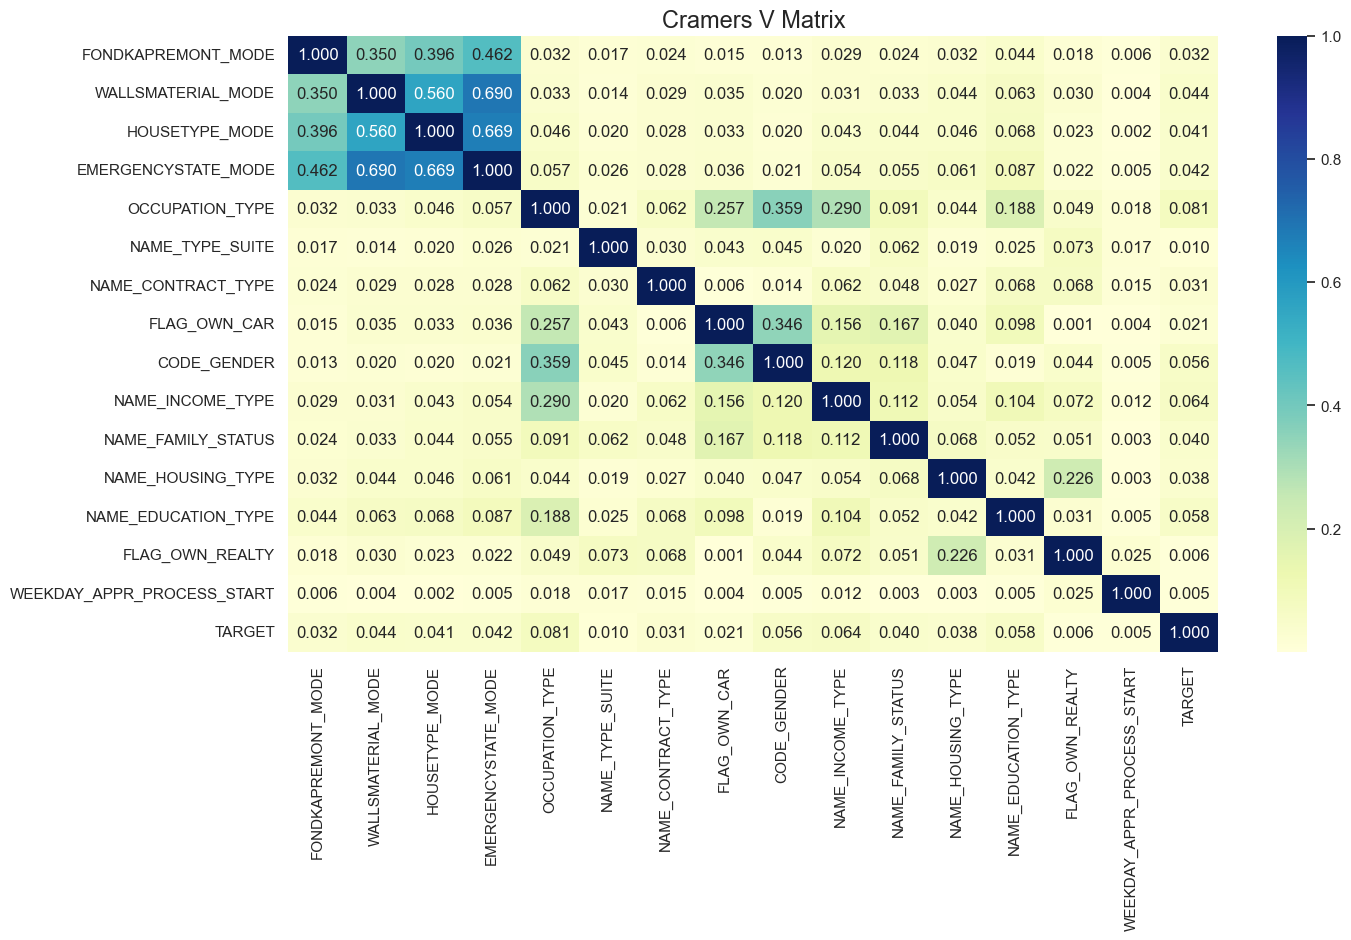

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_cats, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

In [31]:
warnings.filterwarnings("ignore")

corr_bool = f_aux.corr_cat_boolean(df_loan_train[df_loan_bool])
corr_bool

REG_REGION_NOT_LIVE_REGION  FLAG_MOBIL  \
REG_REGION_NOT_LIVE_REGION                     0.999866    0.000000   
FLAG_MOBIL                                     0.000000    0.499995   
FLAG_EMP_PHONE                                 0.037046    0.000000   
FLAG_WORK_PHONE                                0.064987    0.000000   
FLAG_CONT_MOBILE                               0.000000    0.000000   
TARGET                                         0.004242    0.000000   
LIVE_REGION_NOT_WORK_REGION                    0.090931    0.000000   
FLAG_EMAIL                                     0.018803    0.000000   
FLAG_PHONE                                     0.002026    0.000000   
REG_CITY_NOT_LIVE_CITY                         0.339547    0.000000   
REG_CITY_NOT_WORK_CITY                         0.142506    0.000000   
LIVE_CITY_NOT_WORK_CITY                        0.010829    0.000000   
REG_REGION_NOT_WORK_REGION                     0.452122    0.000000   
FLAG_DOCUMENT_4                                0.000000    0.000000   
FLAG_DOCUMENT_5                                0.011142    0.000000   
FLAG_DOCUMENT_2                                0.000000    0.000000   
FLAG_DOCUMENT_3                                0.033288    0.000000   
FLAG_DOCUMENT_11                               0.105901    0.000000   
FLAG_DOCUMENT_10                               0.001342    0.000000   
FLAG_DOCUMENT_9                                0.017142    0.000000   
FLAG_DOCUMENT_8                                0.023536    0.002335   
FLAG_DOCUMENT_7                                0.000000    0.000000   
FLAG_DOCUMENT_6                                0.023963    0.000000   
FLAG_DOCUMENT_12                               0.000000    0.000000   
FLAG_DOCUMENT_13                               0.002580    0.000000   
FLAG_DOCUMENT_19                               0.000000    0.000000   
FLAG_DOCUMENT_18                               0.008837    0.010736   
FLAG_DOCUMENT_17                               0.000000    0.000000   
FLAG_DOCUMENT_16                               0.005940    0.000000   
FLAG_DOCUMENT_15                               0.000000    0.000000   
FLAG_DOCUMENT_14                               0.003106    0.000000   
FLAG_DOCUMENT_20                               0.000610    0.000000   
FLAG_DOCUMENT_21                               0.001759    0.000000   

                             FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
REG_REGION_NOT_LIVE_REGION         0.037046         0.064987   
FLAG_MOBIL                         0.000000         0.000000   
FLAG_EMP_PHONE                     0.999986         0.233843   
FLAG_WORK_PHONE                    0.233843         0.999987   
FLAG_CONT_MOBILE                   0.011449         0.021613   
TARGET                             0.046043         0.027957   
LIVE_REGION_NOT_WORK_REGION        0.096618         0.042017   
FLAG_EMAIL                         0.062399         0.012190   
FLAG_PHONE                         0.014936         0.293571   
REG_CITY_NOT_LIVE_CITY             0.092256         0.045825   
REG_CITY_NOT_WORK_CITY             0.255917         0.121108   
LIVE_CITY_NOT_WORK_CITY            0.218957         0.110478   
REG_REGION_NOT_WORK_REGION         0.108618         0.068964   
FLAG_DOCUMENT_4                    0.000000         0.003075   
FLAG_DOCUMENT_5                    0.018527         0.036079   
FLAG_DOCUMENT_2                    0.001192         0.000000   
FLAG_DOCUMENT_3                    0.248955         0.061083   
FLAG_DOCUMENT_11                   0.029219         0.123001   
FLAG_DOCUMENT_10                   0.000000         0.000598   
FLAG_DOCUMENT_9                    0.023234         0.007848   
FLAG_DOCUMENT_8                    0.122020         0.020747   
FLAG_DOCUMENT_7                    0.000000         0.000000   
FLAG_DOCUMENT_6                    0.597988         0.138504   
FLAG_DOCUMENT_12                   0.000000         0.000000   
FLAG_DOCUMENT_

He dividido el graficado de la V de Cramers en variables categóricas puras, que contienen texto en sus columnas y variables booleanas porque, aunque sean variables que tengan valores numéricos por naturaleza, los valores alojados solo pueden ser dos, 0 o 1. Por tanto, representan variables categóricas como tal, asociadas al valor 0 o al valor 1.

Es por ello que no se puede utilizar la correlación de Spearman para estudiar la correlación entre este tipo de variables con la variable TARGET.

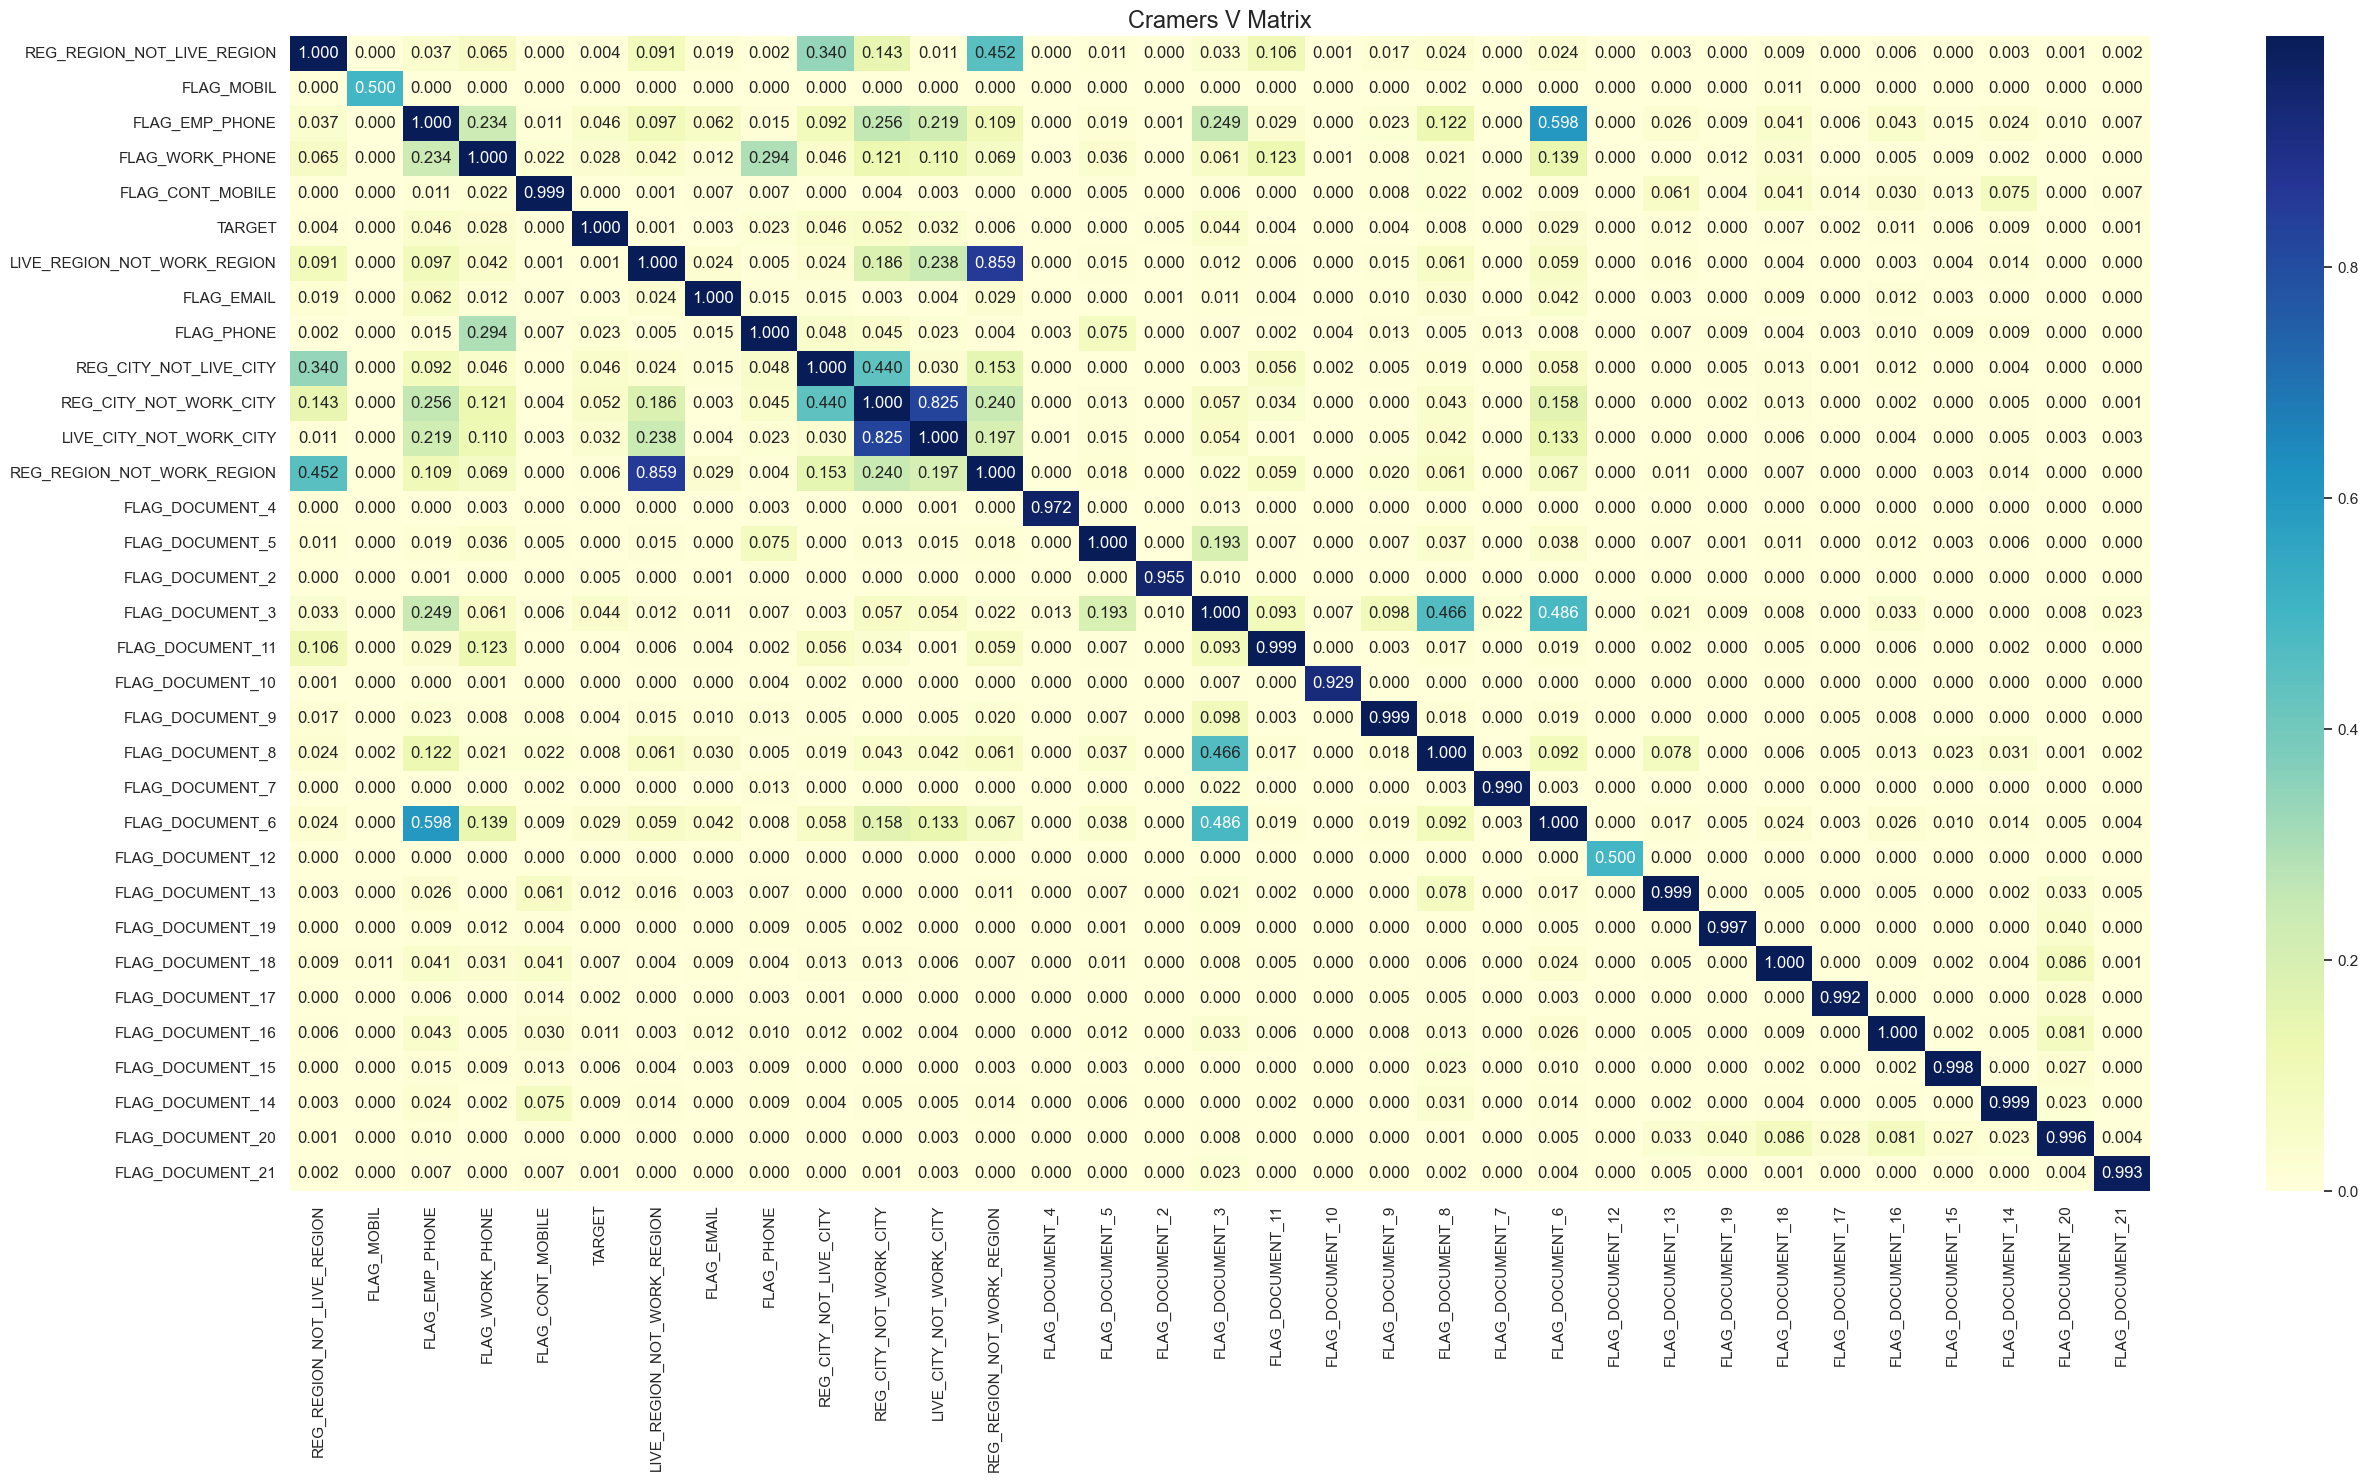

In [32]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_bool, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

Si bien no se observan correlaciones muy altas de las diferentes variables categóricas y booleanas con nuestra variable target, la variable que tiene la correlación más alta es OCCUPATION_TYPE, que comentamos anteriormente en en análisis gráfico. Esta variable presenta una correlación del 8%, aunque no es mucho si que podría tener importancia en el modelo.

Destacar correlaciones entre el 30% y el 70% entre variables como pueden ser el tipo de vivienda y sus materiales de construcción, además de las características de las viviendas. Esta alta relación no es preocupante ya que se trata de una relación lógica.

También observar una correlación del 42.3% entre el nombre del puesto de trabajo que ocupa el cliente y el tipo de empresa en la que trabaja. A priori también una relación normal y no preocupante.


## Weight of Evidence (WoE) e Information Value (IV)

El WoE es una medida que transforma una variable categórica o continua en una escala que refleja la relación entre las probabilidades de los dos grupos de la variable dependiente (por ejemplo, "fraude" y "no fraude"). Se calcula de la siguiente manera:

$$ WoE = ln (Distribución de la clase positiva/Distribución de la clase negativa) $$

Interpretación:

- Si WoE > 0, la categoría tiene una mayor proporción de positivos (indicando un buen predictor para la clase positiva).
- Si WoE < 0, la categoría tiene una mayor proporción de negativos (indicando un buen predictor para la clase negativa).
- WoE = 0 indica que la categoría tiene una distribución balanceada entre positivos y negativos, lo que no aporta mucha información.

#

El Information Value (IV) es una métrica que ayuda a cuantificar la capacidad predictiva de una variable con respecto a la variable objetivo (target). Es una medida acumulada de las diferencias entre las proporciones de positivos y negativos en cada grupo.

El IV se calcula sumando los valores de WoE ponderados por la diferencia entre las proporciones de positivos y negativos en cada grupo:

$$ IV = ∑(Proporción de la clase positiva − Proporción de la clase negativa) × WoE $$

Interpretación del IV:

- IV < 0.02: Baja capacidad predictiva.
- 0.02 < IV < 0.1: Capacidad predictiva débil.
- 0.1 < IV < 0.3: Capacidad predictiva moderada.
- 0.3 < IV < 0.5: Alta capacidad predictiva.
- IV > 0.5: Muy alta capacidad predictiva (aunque se debe tener precaución de no sobreajustar el modelo).

A continuación vamos a calcular el WOE y el IV para algunas variables categóricas que me parecen interesantes. De las que posteriormente comentaremos las conclusiones.

In [33]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='OCCUPATION_TYPE', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'Accountants': np.float64(-0.5400057046334321), 'Cleaning staff': np.float64(0.20125383936768831), 'Cooking staff': np.float64(0.317780773417085), 'Core staff': np.float64(-0.2541654427300936), 'Drivers': np.float64(0.3876294694822735), 'HR staff': np.float64(-0.3778470566427261), 'High skill tech staff': np.float64(-0.29303383912994113), 'IT staff': np.float64(-0.11435561393858834), 'Laborers': np.float64(0.29302322513685075), 'Low-skill Laborers': np.float64(0.8619870550944092), 'Managers': np.float64(-0.3019227627931952), 'Medicine staff': np.float64(-0.2105095609540891), 'Private service staff': np.float64(-0.2755682075223078), 'Realty agents': np.float64(-0.039935644637323194), 'Sales staff': np.float64(0.20619282273186823), 'Secretaries': np.float64(-0.14368624748642267), 'Security staff': np.float64(0.33001694046914937), 'Waiters/barmen staff': np.float64(0.33623333358368496), 'Desconocido': np.float64(-0.24043809051046666)}
IV de la variable: 0.0858796741628

In [34]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='NAME_INCOME_TYPE', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'Businessman': 0, 'Commercial associate': np.float64(-0.08014465465518467), 'Maternity leave': np.float64(2.4324819935799025), 'Pensioner': np.float64(-0.43494908113169145), 'State servant': np.float64(-0.35974790110068705), 'Student': 0, 'Unemployed': np.float64(2.027016885471738), 'Working': np.float64(0.1878468975898912), 'Desconocido': 0}
IV de la variable: 0.05808599223176106


In [35]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='NAME_EDUCATION_TYPE', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'Academic degree': np.float64(-2.4503199290064686), 'Higher education': np.float64(-0.4393091653969691), 'Incomplete higher': np.float64(0.05657720465626268), 'Lower secondary': np.float64(0.3385501370579372), 'Secondary / secondary special': np.float64(0.11163766773089984), 'Desconocido': 0}
IV de la variable: 0.05154040418506241


In [36]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='CODE_GENDER', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'F': np.float64(-0.1579356962666567), 'M': np.float64(0.2556181541980332), 'XNA': 0, 'Desconocido': 0}
IV de la variable: 0.040237003552605975


Voy a comentar mis conclusiones de las 4 variables analizadas:
- En la variable 'OCCUPATION_TYPE' se observa como en trabajos menos cualificados el coeficiente WoE es positivo, es decir, cuanto mayor sea el coeficiente, mayor proporción de 1 en TARGET tendrán este tipo de trabajos. Por tanto, los clientes con trabajos poco cualificados como 'low-skill laborers', 'Drivers', 'Security Staff' o 'Waiters' muestran mayor proporción de 1 en TARGET (dificultad de pago). A su vez, clientes con trabajos más cualificados tienen coeficientes negativos, que supone que la categoría tiene una mayor proporción de clientes con TARGET = 0.

- En la variable 'NAME_INCOME_TYPE' observamos como 'Unemployed' y 'Maternity leave' tienen un gran coeficiente positivo, por lo que son buenos predictores para TARGET = 1 (dificultad de pago). Por otro lado, 'Pensioner' y 'State servant' tienen coeficientes negativos, que supone que la categoría tiene una mayor proporción de clientes con TARGET = 0. 'Businessman' tiene un valor de 0, lo que significa que la categoría tiene una distribución balanceada entre positivos y negativos

- En la variable 'EDUCATION_TYPE' los clientes con mejor educación tienen coeficientes negativos y los clientes de menor educación tienen coeficientes positivos. En principio, es algo lógico.

- La variable 'CODE_GENDER' me parece interesante, pues los hombres 'M' tienen mayor coeficiente que las mujeres 'F', por tanto, a priori la mayoría de la proporción de TARGET = 1 (dificultad de pago) se corresponde a clientes varones.
#
Como conclusión acerca del IV, observamos que todos los valores se encuentran en el intervalo 0.02 < IV < 0.1, por tanto, las variables presentan una capacidad predictiva débil. Esto ocurre ya que es necesario combinar varias variables para forjar una capacidad predictiva fuerte, si una única variable tuviera mucho poder predictivo sobre la variable objetivo podría generar problemas de multicolinealidad, overfitting o sesgo.

## Exportación de datasets

In [37]:
print(df_loan_train.shape, df_loan_test.shape)

(246008, 122) (61503, 122)


In [38]:
df_loan_train.to_csv('../../data_loan_status/data_split/df_loan_train.csv', index=False) 
df_loan_test.to_csv('../../data_loan_status/data_split/df_loan_test.csv', index=False)

## Conclusiones EDA

Como hipótesis inicial y respondiendo a la pregunta planteada para la práctica ¿Hay algún tipo de clientes más propenso a no devolver un préstamo? Según nuestro análisis exploratorio de los datos podríamos deducir que tipo de cliente sería más propenso a no devolver un préstamo. Destacar que este perfilado de clientes es una hipótesis propia realizada bajo mi criterio según los valores estadísticos visualizados en el EDA, que podremos contrastar cuando realicemos el Feature engineering y el modelado. En esa parte de la práctica volveremos a comentar si rechazamos o no rechazamos la hipótesis nula aqui planteada.

Según el análisis exploratorio de los datos realizados en los 2 primeros notebooks, podemos intuir que el tipo de cliente que tendrá dificultades a la hora de pagar o devolver el préstamo de manera completa será:
- Un cliente con una baja educación
- Que tenga un coche antiguo
- Un trabajo cualificadamente bajo
- Que tenga una vivienda construida con materiales pobres, especialmente madera.
- Una familia grande con mas de 2 hijos
- Que esté desempleado o de baja

Posteriormente en la realización del feature engineering y del modelado verificaremos si la hipótesis inicial planteada según mi criterio bajo la interpretación de los estadísticos realizados y visualizados se cumple.

En la realización de este análisis exploratorio de los datos hemos aprendido:

1. Entendimiento profundo de nuestros datos y de la problemática de negocio.
2. La importación de nuestros datos, dimensiones de los mismos, división y reconocimiento de las diferentes categorías aportando una visualización de las mismas.
3. Detección, graficado y análisis de nuestra variable objetivo. Concluyendo que presentaba un claro desbalanceo.
4. Separación de nuestro dataset en train y test de manera estratificada debido al desbalanceo de nuestra variable objetivo.
5. Visualización descriptiva de nuestras variables, pudiendo comprender su naturaleza, distribución e importancia en la variable objetivo.
6. Tratamiento de valores atípicos (outliers), comprendiendo la importancia de los mismos y la repercusión que pudieran tener en la fase de modelado.
7. Tratamiento de valores nulos, en todas las categorías de los datos (numéricos, booleanos y categóricos), aprendiendo y reflexionando sobre las diferentes métricas de imputación de valores nulos. Observando como afectan a la distribución y a la descripción estadística de nuestras variables.
8. Análisis de correlación de las variables, pudiendo comprender como afecta una alta correlación en nuestra variable objetivo.

Todo esto nos permitió comprender que trabajamos con un Dataset que contiene muchas variables de diferentes tipos, con las cuales buscamos explicar y predecir el comportamiento de nuestra variable objetivo, es decir, cuando un cliente puede llegar a tener dificultades en el pago de un préstamo.

Con estas conclusiones, tenemos un problema complejo por delante que supondrá un gran reto desde el punto de vista del éxito de nuestros modelos, debido a que el modelo más simple de todos sería decir que pocos clientes tendrían dificultades en el pago del préstamo, ya que sólo tendríamos error en el 8.07% de las veces. El objetivo será intentar mejorar ese porcentaje agregando complejidad a nuestro análisis.

#### Cosas a tener en cuenta a la hora de ejecutar modelos:

- Podría ser necesario balancear el modelo, con técnicas de oversampling
- Hay variables que identificamos como importantes para predecir la dificultad de pago, como OCCUPATION_TYPE (puesto de trabajo), NAME_EDUCATION_TYPE (tipo de educación), NAME_INCOME_TYPE (pensionista, estudiante, trabajador), CNT_CHILDREN (tamaño de la familia), entre otras.
- Posibilidad de realizar un Mean Encoding en vez de One-Hot encoding para variables categóricas que presenten muchas categorías.